# Machine Learning Workflow: Mathematical Foundations and Data Processing

This notebook is designed to build your foundational skills in Python, NumPy, and Matplotlib within the context of **machine learning data processing**. This is not just a programming exercise—you'll learn the essential mathematical and computational concepts that underpin modern data science.

## Learning Objectives

By completing this notebook, we will have brushed up your knowledge about the following topics:

### 1. **Mathematical Foundations**
- **Linear algebra operations** using NumPy arrays (vectors, matrices, tensor operations)
- **Statistical measures** and their computational implementation
- **Normalization techniques** and their mathematical formulations
- **Distance metrics** and similarity measures

### 2. **Data Structures and Representations**
- **Tabular data**: Feature matrices $\mathbf{X} \in \mathbb{R}^{n \times d}$ where $n$ = samples, $d$ = features
- **Image data**: Multi-dimensional tensors $\mathbf{I} \in \mathbb{R}^{H \times W \times C}$ (Height × Width × Channels)
- **Label vectors**: Target variables $\mathbf{y} \in \{0, 1, ..., k-1\}^n$ for classification

### 3. **Core Data Science Operations**
- **Indexing and slicing**: Efficient data access patterns
- **Statistical analysis**: Descriptive statistics, distributions, and visualizations
- **Data preprocessing**: Normalization, standardization, and encoding techniques
- **Visualization**: Exploratory data analysis through plots and graphs

### 4. **Mathematical Preprocessing Techniques**
- **Min-Max Normalization**: $x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$
- **Z-Score Standardization**: $x_{std} = \frac{x - \mu}{\sigma}$
- **Unit Vector Normalization**: $\mathbf{x}_{unit} = \frac{\mathbf{x}}{||\mathbf{x}||_2}$

---

**Prerequisites**: Basics in Python and its core data science packages: `matplotlib` and `numpy`. If you encounter difficulties with Python syntax, NumPy operations, or Matplotlib plotting, please refer to the specialized notebooks:
- `python_basics.ipynb` for Python fundamentals
- `numpy.ipynb` for NumPy array operations
- `matplotlib.ipynb` for data visualization techniques


---

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_openml

# Initialise matplotlib settings
def setup_matplotlib():
    """
    Configure matplotlib for better visualization quality.
    
    Returns:
    --------
    None
        Configures global matplotlib settings for the notebook.
    """
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3

setup_matplotlib()

✓ Libraries imported and matplotlib configured successfully!


## 1. Loading and Understanding Tabular Feature Datasets

### Mathematical Representation of Tabular Data

In machine learning, tabular data is represented as a **feature matrix** $\mathbf{X} \in \mathbb{R}^{n \times d}$:

$$\mathbf{X} = \begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,d} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n,1} & x_{n,2} & \cdots & x_{n,d}
\end{pmatrix}$$

Where:
- $n$ = number of **samples** (observations, data points)
- $d$ = number of **features** (dimensions, attributes)
- $x_{i,j}$ = value of feature $j$ for sample $i$

Each **row** $\mathbf{x}_i = (x_{i,1}, x_{i,2}, ..., x_{i,d})$ represents one data sample.
Each **column** represents one feature across all samples.

### The Iris Dataset: A Classic ML Example

The **Iris dataset** (Fisher, 1936) is a foundational dataset in pattern recognition and machine learning:

**Dataset Properties:**
- **$n = 150$ samples** (50 from each of 3 species)
- **$d = 4$ features**: All continuous numerical measurements in centimeters
  1. Sepal length: $x_1 \in [4.3, 7.9]$ cm
  2. Sepal width: $x_2 \in [2.0, 4.4]$ cm  
  3. Petal length: $x_3 \in [1.0, 6.9]$ cm
  4. Petal width: $x_4 \in [0.1, 2.5]$ cm
- **$k = 3$ classes**: Setosa, Versicolor, Virginica (perfectly balanced)

**Why is this dataset important?**
- **Linear separability**: Setosa is linearly separable from the other classes
- **Non-linear separability**: Versicolor and Virginica overlap in feature space
- **Real-world complexity**: Demonstrates realistic classification challenges
- **Educational value**: Small enough to visualize, complex enough to be meaningful

### The Target Vector Representation

The **target vector** $\mathbf{y} \in \{0, 1, 2\}^{150}$ encodes class membership:
- $y_i = 0$ for Setosa samples
- $y_i = 1$ for Versicolor samples  
- $y_i = 2$ for Virginica samples

This is called **label encoding** or **integer encoding** of categorical variables.

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the load_iris_dataset() function below. 

Your implementation should: 

1. Import the iris dataset from scikit-learn using sklearn. 
2. Extract the components: feature matrix X, target vector y, feature names, and target names. 
3. Print basic information about the dataset: 
    - Dataset shape (number of samples and features), 
    - Feature names and their ranges (min/max values)
    - Target names and class distribution.
4. Return all components as a tuple: (X, y, feature_names, target_names)
</div>

In [ ]:
# Hints:
# - Use: from sklearn.datasets import load_iris
# - The loaded dataset has attributes: .data, .target, .feature_names, .target_names
# - Use np.unique(y, return_counts=True) to get class distribution
# - Use np.min() and np.max() to find feature ranges

def load_iris_dataset():
    """
    Load the Iris dataset from scikit-learn and print basic information.
    
    Returns:
    --------
    tuple: (X, y, feature_names, target_names)
        X : numpy.ndarray of shape (150, 4)
            Feature matrix containing sepal/petal measurements
        y : numpy.ndarray of shape (150,)
            Target labels (0=Setosa, 1=Versicolor, 2=Virginica)
        feature_names : list of str
            Names of the 4 features
        target_names : list of str
            Names of the 3 species classes

    """
    raise NotImplementedError("Implement the function to load the Iris dataset.")
    
    return X, y, feature_names, target_names

✓ Iris dataset loaded successfully!
  Features shape: (150, 4)
  Target shape: (150,)
  Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# Load the dataset
X, y, feature_names, target_names = load_iris_dataset()

### 1.1 Exploratory Data Analysis (EDA): Understanding Your Data

Before applying any machine learning algorithm, you must understand your data's **structure**, **distribution**, and **quality**. This process is called **Exploratory Data Analysis (EDA)**.

**Key Questions to Answer:**

1. **Shape and Dimensionality**
   - How many samples $n$ and features $d$?
   - What is the data complexity? (High-dimensional data requires different approaches)

2. **Data Types and Ranges**
   - Are features continuous, discrete, or categorical?
   - What are the value ranges for each feature?
   - Are there natural units (e.g., cm, pixels, counts)?

3. **Statistical Properties**
   - **Central tendency**: Mean $\mu = \frac{1}{n}\sum_{i=1}^n x_i$
   - **Variability**: Standard deviation $\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i - \mu)^2}$
   - **Range**: $[x_{min}, x_{max}]$

4. **Data Quality**
   - Missing values? (Requires imputation strategies)
   - Outliers? (May need robust preprocessing)
   - Class balance? (Imbalanced datasets need special handling)

5. **Feature Relationships**
   - Are features correlated? (Multicollinearity affects some algorithms)
   - Which features might be most discriminative?

**Mathematical Note**: Computing statistics across the **sample axis** (axis=0) gives feature-wise statistics, while computing across the **feature axis** (axis=1) gives sample-wise statistics.

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the analyze_dataset_structure() function below.
    
Your implementation should:

1. Extract dataset dimensions (n_samples, n_features) from X.shape
2. Display the first 5 samples from the dataset
3. Compute feature-wise statistics using NumPy:
    - Mean values for each feature (across all samples)
    - Standard deviation for each feature
    - Minimum and maximum values for each feature
4. Analyze class distribution:
    - Count how many samples belong to each class
    - Calculate percentages for each class
    - Display results with class names from target_names
5. Return a dictionary with shape, statistics, and class_distribution

</div>

In [ ]:
def analyze_dataset_structure(X, y, feature_names, target_names):
    """
    Perform comprehensive exploratory data analysis on a tabular dataset.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix
    y : numpy.ndarray of shape (n_samples,)
        Target labels
    feature_names : list of str
        Names of features
    target_names : list of str
        Names of target classes
    
    Returns:
    --------
    dict : Analysis results containing:
        - 'shape': Dataset dimensions
        - 'statistics': Mean, std, min, max per feature
        - 'class_distribution': Sample count per class

    """

    raise NotImplementedError("Implement the function to analyze dataset structure.")

    # Shape Information
    n_samples, n_features =

    # Feature-wise statistics
    feature_stats = {
        'mean': ,
        'std': ,
        'min': ,
        'max': 
    }

    # Dataset class distribution
    class_distribution = 
    
    return {
        'shape': (n_samples, n_features),
        'statistics': feature_stats,
        'class_distribution': class_distribution
    }

DATASET STRUCTURE ANALYSIS
Dataset Shape: (150, 4)
Number of samples: 150
Number of features: 4

First 5 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

FEATURE-WISE STATISTICS:
Mean per feature: [5.84333333 3.05733333 3.758      1.19933333]
Std per feature:  [0.82530129 0.43441097 1.75940407 0.75969263]
Min per feature:  [4.3 2.  1.  0.1]
Max per feature:  [7.9 4.4 6.9 2.5]

CLASS DISTRIBUTION:
  setosa: 50 samples (33.3%)
  versicolor: 50 samples (33.3%)
  virginica: 50 samples (33.3%)


In [ ]:
# Analyze the Iris dataset
analysis_results = analyze_dataset_structure(X, y, feature_names, target_names)

## 2. Image Data: Multi-Dimensional Arrays and Computer Vision Foundations

### Mathematical Representation of Images

Unlike tabular data, **images** are represented as **multi-dimensional tensors**:

**Grayscale Images**: $\mathbf{I} \in \mathbb{R}^{H \times W}$
$$\mathbf{I} = \begin{pmatrix}
I_{1,1} & I_{1,2} & \cdots & I_{1,W} \\
I_{2,1} & I_{2,2} & \cdots & I_{2,W} \\
\vdots & \vdots & \ddots & \vdots \\
I_{H,1} & I_{H,2} & \cdots & I_{H,W}
\end{pmatrix}$$

**Color Images**: $\mathbf{I} \in \mathbb{R}^{H \times W \times C}$ where:
- $H$ = height (number of rows/pixels vertically)
- $W$ = width (number of columns/pixels horizontally)  
- $C$ = channels (1 for grayscale, 3 for RGB, 4 for RGBA)
- $I_{i,j,c}$ = intensity of pixel at position $(i,j)$ in channel $c$

### Pixel Intensity and Color Spaces

**Pixel Intensities**:
- **8-bit images**: Integer values $I_{i,j} \in \{0, 1, 2, ..., 255\}$
  - 0 = black (no intensity)
  - 255 = white (maximum intensity)
- **Normalized images**: Float values $I_{i,j} \in [0, 1]$
  - 0.0 = black, 1.0 = white
  - Common in deep learning (better numerical stability)

**RGB Color Space**: Each pixel has three components $(R, G, B)$
- $R$ = Red channel intensity
- $G$ = Green channel intensity  
- $B$ = Blue channel intensity
- Combined they produce the perceived color

### The MNIST Dataset: Handwritten Digit Recognition

**MNIST** (Modified National Institute of Standards and Technology) is the "Hello World" of computer vision:

**Dataset Properties**:
- **70,000 images** total (60,000 training + 10,000 test)
- **28×28 pixels** per image ($H = W = 28$)
- **Grayscale** ($C = 1$, single channel)
- **10 classes**: Digits 0, 1, 2, ..., 9
- **Pixel values**: $I_{i,j} \in [0, 255]$ (8-bit grayscale)

**Mathematical Representation**:
- Feature matrix: $\mathbf{X} \in \mathbb{R}^{70000 \times 784}$ (flattened pixels)
- Image tensor: $\mathbf{I} \in \mathbb{R}^{70000 \times 28 \times 28}$ (spatial structure preserved)
- Target vector: $\mathbf{y} \in \{0, 1, 2, ..., 9\}^{70000}$

**Why is MNIST important?**
- **Benchmark dataset**: Standard for comparing algorithm performance
- **Manageable size**: Small enough for quick experimentation
- **Real-world relevance**: Basis for OCR (Optical Character Recognition) systems
- **Visualization**: Easy to see what the algorithm is learning

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the load_mnist_dataset() function below. 

Your implementation should: 

1. Import the MNIST dataset from scikit-learn using sklearn.datasets.fetch_openml
2. Load the dataset with name="mnist_784" and version=1
3. Extract images and labels from the dataset
4. Limit the dataset to max_samples if specified
5. Reshape images to proper format (n_samples, 28, 28) for visualization
6. Convert labels to integers
7. Print dataset information (shape, pixel value range, available digits, samples per class)
8. Return the processed images and labels
    
    
</div>

Loading MNIST dataset (this may take a moment)...
✓ MNIST dataset loaded successfully!
  Dataset shape: (5000, 28, 28)
  Image dimensions: 28×28 pixels
  Pixel value range: [0, 255]
  Available digits: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
  Samples per class: ~500


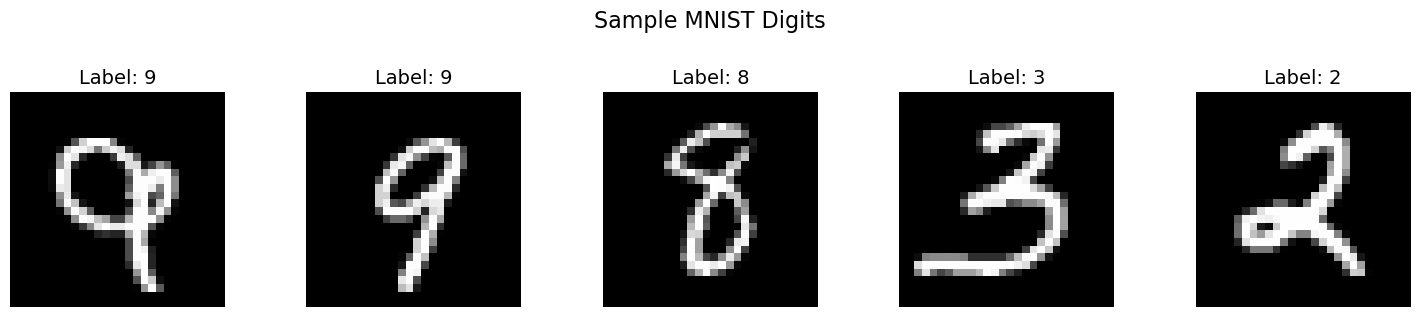

In [ ]:
# Notes:
# ------
# - Original MNIST images are 28x28 pixels, grayscale
# - Pixel intensities range from 0 (black) to 255 (white)
# - Dataset is balanced with ~7000 samples per digit class

def load_mnist_dataset(max_samples=5000):
    """
    Load the MNIST handwritten digits dataset from scikit-learn.
    
    Parameters:
    -----------
    max_samples : int, default=5000
        Maximum number of samples to load (for faster processing in tutorials).
        Set to None to load all 70,000 samples.
    
    Returns:
    --------
    tuple: (images, labels)
        images : numpy.ndarray of shape (n_samples, 28, 28)
            Grayscale images with pixel values in [0, 255]
        labels : numpy.ndarray of shape (n_samples,)
            Integer labels from 0-9 representing digit classes

    """
    print("Loading MNIST dataset (this may take a moment)...")
    
    # Load data from OpenML
    mnist = fetch_openml('mnist_784', version=1, parser='auto')
    
    # Convert to numpy arrays and reshape
    images = np.array(mnist.data, dtype=np.float32).reshape(-1, 28, 28)
    labels = np.array(mnist.target, dtype=int)
    
    # Subsample if requested (for faster processing)
    if max_samples is not None and len(images) > max_samples:
        indices = np.random.choice(len(images), max_samples, replace=False)
        images = images[indices]
        labels = labels[indices]
    
    print(f"✓ MNIST dataset loaded successfully!")
    print(f"  Dataset shape: {images.shape}")
    print(f"  Image dimensions: {images.shape[1]}×{images.shape[2]} pixels")
    print(f"  Pixel value range: [{images.min():.0f}, {images.max():.0f}]")
    print(f"  Available digits: {sorted(np.unique(labels))}")
    print(f"  Samples per class: ~{len(images) // 10}")
    
    return images, labels



# Load MNIST dataset (using subset for faster processing)
images, labels = load_mnist_dataset(max_samples=5000)

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the visualize_sample_images() function below. 

Your implementation should: 

1. Create a subplot grid using plt.subplots
2. Handle the special case when n_samples=1 (axes becomes a single object, not array)
3. For each subplot:
    - Display the image using imshow() with grayscale colormap
    - Set appropriate pixel value range
    - Add title showing the label for that image
    - Remove axis ticks and labels
5. Add an overall title to the entire figure
6. Display the plot
    
</div>

In [ ]:
def visualize_sample_images(images, labels, n_samples=5, title="Sample Images"):
    """
    Display a grid of sample images with their labels.
    
    Parameters:
    -----------
    images : numpy.ndarray of shape (n_images, height, width)
        Array of grayscale images
    labels : numpy.ndarray of shape (n_images,)
        Corresponding labels for each image
    n_samples : int, default=5
        Number of images to display
    title : str, default="Sample Images"
        Title for the plot
    """

    raise NotImplementedError("Implement the function to visualize sample images.")

    # Leave as is
    plt.tight_layout()
    plt.show()

In [ ]:
# Visualize sample images
visualize_sample_images(images, labels, n_samples=5, title="Sample MNIST Digits")

## 3. Array Indexing and Slicing: Mathematical Operations on Data

**Array indexing** is not just a programming concept—it's a fundamental mathematical operation for **data selection** and **subsetting**. In machine learning, we constantly need to:

- **Select subsets** of data for training/validation/testing
- **Extract specific features** for analysis
- **Filter data** based on conditions
- **Crop images** to focus on regions of interest

### Mathematical Notation for Data Slicing

**For tabular data** $\mathbf{X} \in \mathbb{R}^{n \times d}$:

**Row Selection** (Sample subset):
- $\mathbf{X}_{[i:j, :]}$ = rows $i$ through $j-1$, all columns
- $\mathbf{X}_{[I, :]}$ where $I = \{i_1, i_2, ..., i_k\}$ = specific rows

**Column Selection** (Feature subset):
- $\mathbf{X}_{[:, j]}$ = all rows, column $j$ (single feature)
- $\mathbf{X}_{[:, J]}$ where $J = \{j_1, j_2, ..., j_m\}$ = feature subset

**Boolean Indexing** (Conditional selection):
- $\mathbf{X}_{[mask, :]}$ where $mask = (y == c)$ for class $c$
- Example: $\mathbf{X}_{setosa} = \{x_i : y_i = 0\}$ (all Setosa samples)

### Advanced Indexing Operations

**Statistical Filtering**:
Given feature $j$ with values $\mathbf{x}_j = (x_{1,j}, x_{2,j}, ..., x_{n,j})$:

- **Outlier removal**: $mask = (|x_{i,j} - \mu_j| < 2\sigma_j)$
- **Quantile filtering**: $mask = (Q_{0.25} \leq x_{i,j} \leq Q_{0.75})$
- **Threshold filtering**: $mask = (x_{i,j} > \tau)$ for threshold $\tau$

**Multi-condition Filtering**:
- **Logical AND**: $mask_1 \land mask_2$ (both conditions true)
- **Logical OR**: $mask_1 \lor mask_2$ (either condition true)
- **Logical NOT**: $\neg mask$ (condition false)

### Image Slicing: Spatial Data Operations

**For images** $\mathbf{I} \in \mathbb{R}^{H \times W}$ or $\mathbf{I} \in \mathbb{R}^{H \times W \times C}$:

**Spatial Cropping**:
$$\mathbf{I}_{crop} = \mathbf{I}_{[y_1:y_2, x_1:x_2]} \quad \text{or} \quad \mathbf{I}_{[y_1:y_2, x_1:x_2, :]}$$

**Common Image Operations**:
- **Center crop**: Extract $k \times k$ region from image center
- **Corner extraction**: $\mathbf{I}_{[0:k, 0:k]}$ (top-left corner)
- **Region of Interest (ROI)**: Extract specific spatial regions
- **Patch extraction**: For data augmentation or sliding window analysis

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the demonstrate_tabular_slicing() function below. 

Your implementation should: 

1. **Feature subset selection**: 
    - Select specific features (columns) using integer indexing
    - Extract first 10 samples with selected features: X[:10, feature_indices]
    - Print feature names and resulting array shape

2. **Class-based filtering** (Boolean indexing):
    - Create boolean mask to filter samples by target class: y == target_class
    - Apply mask to both features and labels: X[class_mask], y[class_mask]
    - Count and display samples for the selected class

3. **Condition-based filtering**:
    - Create boolean mask based on feature values: X[:, feature_idx] > threshold
    - Filter data using the condition mask
    - Analyze species distribution in filtered data
    - Display sample information meeting the condition

4. **Return results dictionary** with feature_subset, class_subset, and condition_subset

    
</div>

In [ ]:
def demonstrate_tabular_slicing(X, y, feature_names, target_names):
    """
    Demonstrate various data slicing and filtering techniques on tabular data.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix
    y : numpy.ndarray of shape (n_samples,)
        Target labels
    feature_names : list of str
        Names of features
    target_names : list of str
        Names of target classes
    
    Returns:
    --------
    dict : Dictionary containing sliced data examples:
        - 'feature_subset': Selected features for first 10 samples
        - 'class_subset': Samples belonging to specific class
        - 'condition_subset': Samples meeting specific condition

    """

    raise NotImplementedError("Implement the function to demonstrate tabular slicing.")
    
    # Example 1: Feature subset selection
    print("1. FEATURE SUBSET SELECTION")

    
    # Example 2: Class-based filtering (Boolean indexing)
    print(f"\n2. CLASS-BASED FILTERING")


    # Example 3: Condition-based filtering
    print(f"\n3. CONDITION-BASED FILTERING")
    
    return {
        'feature_subset': X_slice,
        'class_subset': X_class,
        'condition_subset': X_condition
    }

TABULAR DATA SLICING DEMONSTRATIONS
1. FEATURE SUBSET SELECTION
------------------------------
Selected features: ['sepal length (cm)', 'petal length (cm)']
First 10 samples with selected features:
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]]
Resulting shape: (10, 2)

2. CLASS-BASED FILTERING
------------------------------
Filtering for class: setosa
Boolean mask sum: 50 samples found
First 5 setosa samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

3. CONDITION-BASED FILTERING
------------------------------
Condition: petal length (cm) > 5.0 cm
Samples meeting condition: 42
Species distribution for filtered data:
  versicolor: 1 samples
  virginica: 41 samples

First 5 samples meeting condition:
  Sample 1: petal length (cm) = 5.10 cm, Species = versicolor
  Sample 2: petal length (cm) = 6.00 cm, Species = virginica
  Sample 3: petal length (cm) = 5.10 cm, Species =

In [ ]:
# Demonstrate tabular data slicing techniques
slicing_results = demonstrate_tabular_slicing(X, y, feature_names, target_names)

### Image Data Indexing: Spatial Coordinates and Array Operations

**Coordinate Systems in Images**:

In NumPy arrays (and most computer vision libraries), images use **matrix indexing**:
- **First dimension**: rows (y-coordinate, vertical position)
- **Second dimension**: columns (x-coordinate, horizontal position)
- **Origin (0,0)**: Top-left corner of the image

$$\mathbf{I}[y, x] = \text{pixel at row } y, \text{ column } x$$

**Spatial Relationships**:
- Moving **right**: increase $x$ (column index)
- Moving **down**: increase $y$ (row index)
- **Width**: number of columns ($W$)
- **Height**: number of rows ($H$)

**Mathematical Operations on Image Regions**:

**Cropping Window**: Extract subregion $\mathbf{I}_{crop} \in \mathbb{R}^{h \times w}$
$$\mathbf{I}_{crop} = \mathbf{I}_{[y_{start}:y_{end}, x_{start}:x_{end}]}$$

where:
- $h = y_{end} - y_{start}$ (crop height)
- $w = x_{end} - x_{start}$ (crop width)

**Center Cropping** (common preprocessing technique):
For image $\mathbf{I} \in \mathbb{R}^{H \times W}$, extract center region of size $h \times w$:

$$y_{start} = \frac{H - h}{2}, \quad x_{start} = \frac{W - w}{2}$$
$$y_{end} = y_{start} + h, \quad x_{end} = x_{start} + w$$

<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the demonstrate_image_slicing() function below. 

Your implementation should: 

1. **Center cropping** (extract 14x14 center region from 28x28 images):
    - Calculate start indices: (28-14)//2 = 7 for both dimensions
    - Extract center crop: images[i, 7:21, 7:21]
    - Store in results dictionary

2. **Visualization**: Create subplot grid showing original and sliced regions

3. **Return results dictionary** with all extracted regions
    
    
</div>

Applying image slicing to MNIST digits...
IMAGE SLICING AND CROPPING DEMONSTRATIONS
Original image dimensions: 28×28 pixels
Crop size: 14×14 pixels
Crop coordinates: y=[7:21], x=[7:21]


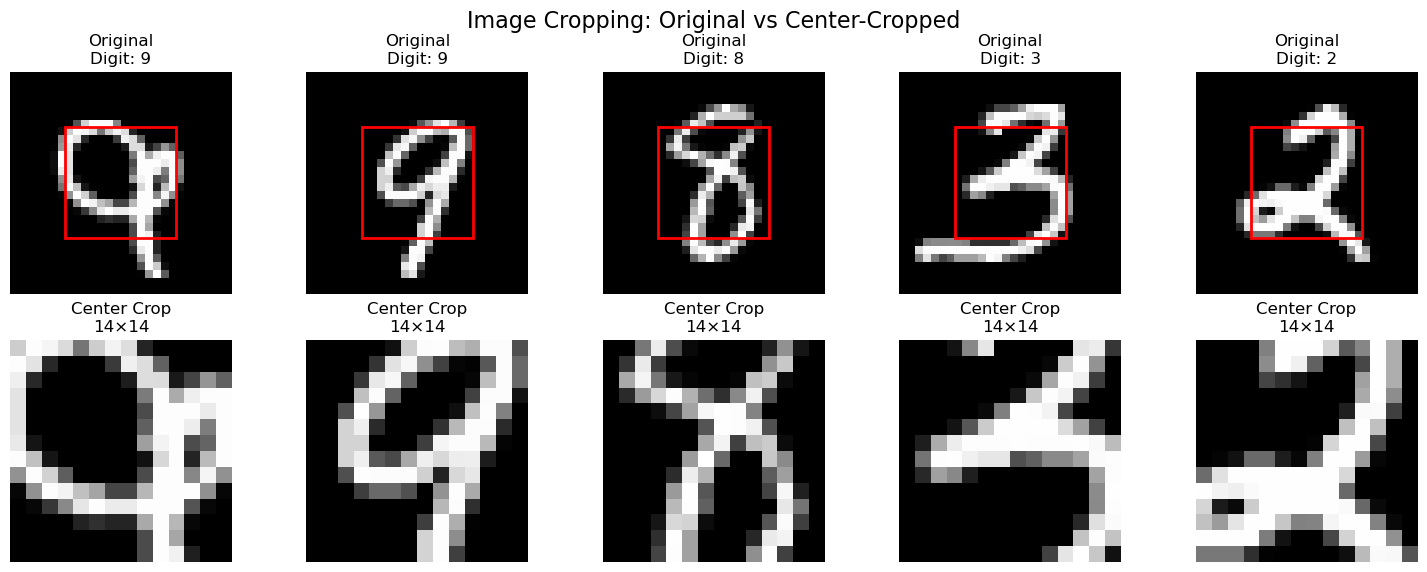


Shape Analysis:
  Original image shape: (28, 28)
  Cropped image shape: (14, 14)
  Dimension reduction: 784 → 196 pixels
  Reduction ratio: 25.00%

ADVANCED SLICING TECHNIQUES
----------------------------------------


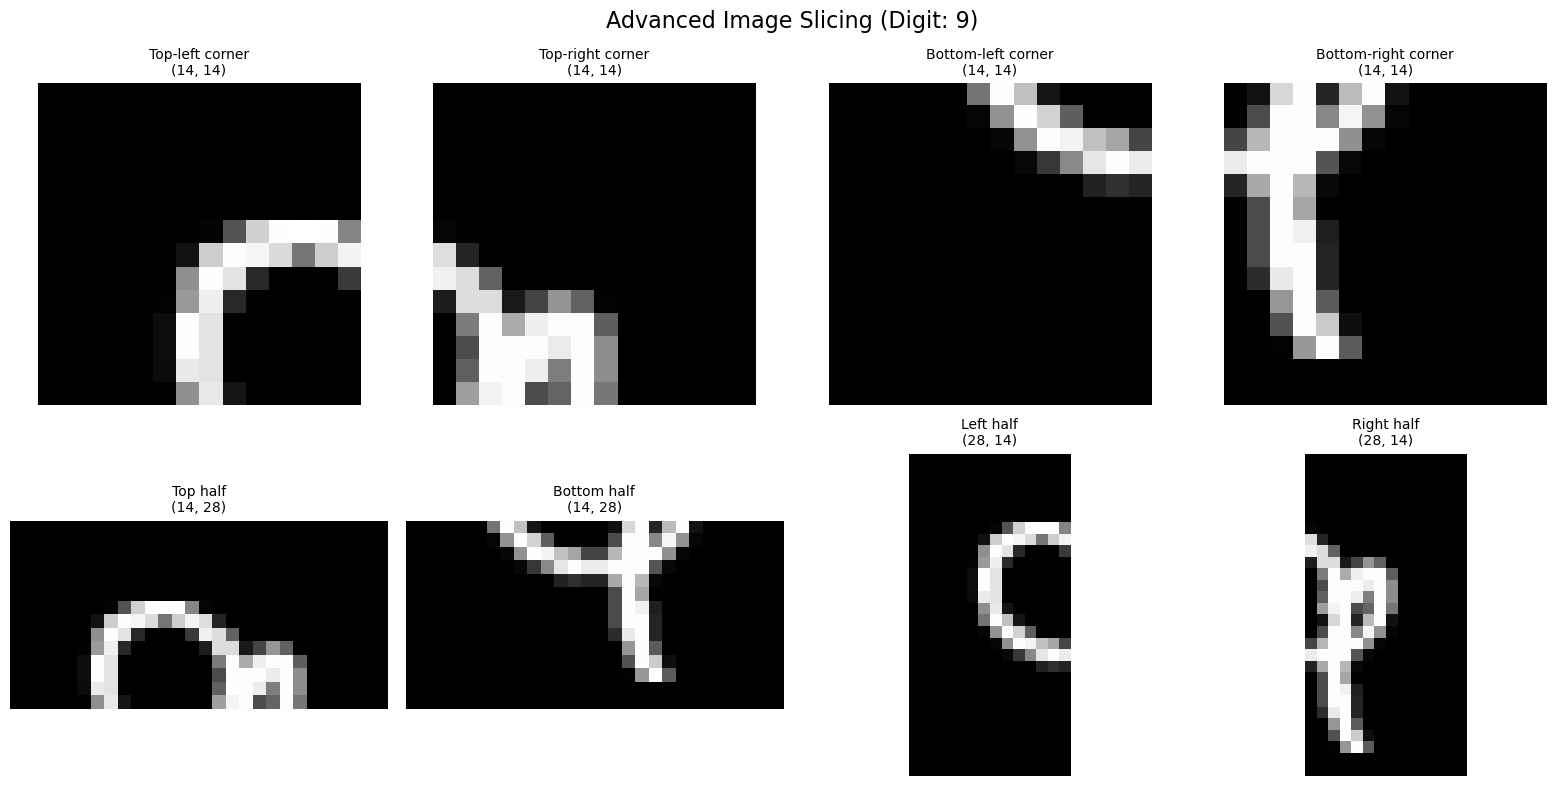

In [ ]:
def demonstrate_image_slicing(images, labels, n_samples=5):
    """
    Demonstrate various image slicing and cropping techniques.
    
    Parameters:
    -----------
    images : numpy.ndarray of shape (n_images, height, width)
        Array of grayscale images
    labels : numpy.ndarray of shape (n_images,)
        Corresponding labels for each image
    n_samples : int, default=5
        Number of images to process and display
    
    Returns:
    --------
    dict : Dictionary containing:
        - 'original_shapes': Shape of original images
        - 'cropped_images': List of center-cropped images
        - 'cropped_shapes': Shape of cropped images
    

    """
    print("IMAGE SLICING AND CROPPING DEMONSTRATIONS")
    
    raise NotImplementedError("Implement the function to demonstrate image slicing.")

    
    # Calculate center crop coordinates

    
    # Perform center cropping

    
    # Visualize original vs cropped images

    print("="*60)

    plt.tight_layout()
    plt.show()
    
    # Print shape information

    
    return {
        'original_shapes': ,
        'cropped_images': ,
        'cropped_shapes': ,
        'crop_coordinates':
    }

In [ ]:
# Demonstrate image slicing techniques
print("Applying image slicing to MNIST digits...")
cropping_results = demonstrate_image_slicing(images, labels, n_samples=5)


<div class='alert alert-warning'>
    <b>ToDo</b>: Complete the demonstrate_advanced_slicing() function below. 

Your implementation should: 
    
1. **Define slicing operations dictionary** with 8 different regions:
    - 4 corner quadrants (top-left, top-right, bottom-left, bottom-right)
    - 4 half regions (top half, bottom half, left half, right half)
    - Use slice objects: slice(start, end) for each dimension

2. **Extract and visualize sliced regions**:
    - Apply each slicing operation to the first image
    - Create 2x4 subplot grid using plt.subplots(2, 4, figsize=(16, 8))
    - Display each sliced region with title showing name and shape
    - Use grayscale colormap with consistent scaling (vmin=0, vmax=255)

3. **Add proper formatting**:
    - Set subplot titles with region name and dimensions
    - Remove axes
    - Add overall title showing the digit label

4. **Return results dictionary** containing all sliced regions

</div>

In [ ]:
def demonstrate_advanced_slicing(images, labels, n_samples=3):
    """
    Demonstrate advanced image slicing techniques.
    
    Parameters:
    -----------
    images : numpy.ndarray of shape (n_images, height, width)
        Array of grayscale images  
    labels : numpy.ndarray of shape (n_images,)
        Corresponding labels
    n_samples : int, default=3
        Number of images to process
    
    Returns:
    --------
    dict : Various sliced regions (corners, edges, etc.)
    """
    print(f"\nADVANCED SLICING TECHNIQUES")

    raise NotImplementedError("Implement the function to demonstrate image slicing.")

    slicing_ops = {}

    # Plot the Results
    plt.tight_layout()
    plt.show()
    
    return {name: img[y_slice, x_slice] for name, (y_slice, x_slice) in slicing_ops.items()}

In [ ]:
# Demonstrate advanced image slicing techniques
advanced_slicing_results = demonstrate_advanced_slicing(images, labels, n_samples=1)

## 4. Data Visualization: Statistical Analysis and Pattern Recognition

### 4.1 The Role of Visualization in Machine Learning

**Data visualization** is not just about making pretty plots—it's a crucial **analytical tool** for:

1. **Understanding data distributions**: Are features normally distributed? Skewed? Multimodal?
2. **Detecting outliers**: Values that might indicate errors or rare cases
3. **Revealing relationships**: Correlations, clusters, and patterns
4. **Assessing class separability**: Can classes be distinguished visually?
5. **Validating assumptions**: Do the data meet algorithm requirements?
6. **Debugging models**: Understanding where algorithms succeed or fail

### 4.2 Statistical Distributions and Their Interpretation

**Histogram Analysis**: For feature $\mathbf{x}_j = (x_{1,j}, x_{2,j}, ..., x_{n,j})$

A **histogram** shows the **empirical probability distribution**:
- **Bins**: Intervals $[b_k, b_{k+1})$ that partition the data range
- **Frequency**: $f_k = |\{x_i : b_k \leq x_i < b_{k+1}\}|$
- **Density**: $p_k = \frac{f_k}{n \cdot \Delta b}$ where $\Delta b$ is bin width

**Common Distribution Patterns**:
- **Normal (Gaussian)**: Bell-shaped, symmetric around mean
  $$p(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
- **Skewed**: Asymmetric with long tail (positive/negative skew)
- **Uniform**: Approximately constant across range
- **Bimodal**: Two distinct peaks (might indicate mixed populations)
- **Heavy-tailed**: More extreme values than normal distribution

**Why distribution shape matters**:
- **Algorithm assumptions**: Many ML algorithms assume normality
- **Preprocessing needs**: Skewed data might need log transformation
- **Outlier detection**: Values beyond 2-3 standard deviations are suspicious
- **Feature scaling**: Different distributions require different normalization approaches

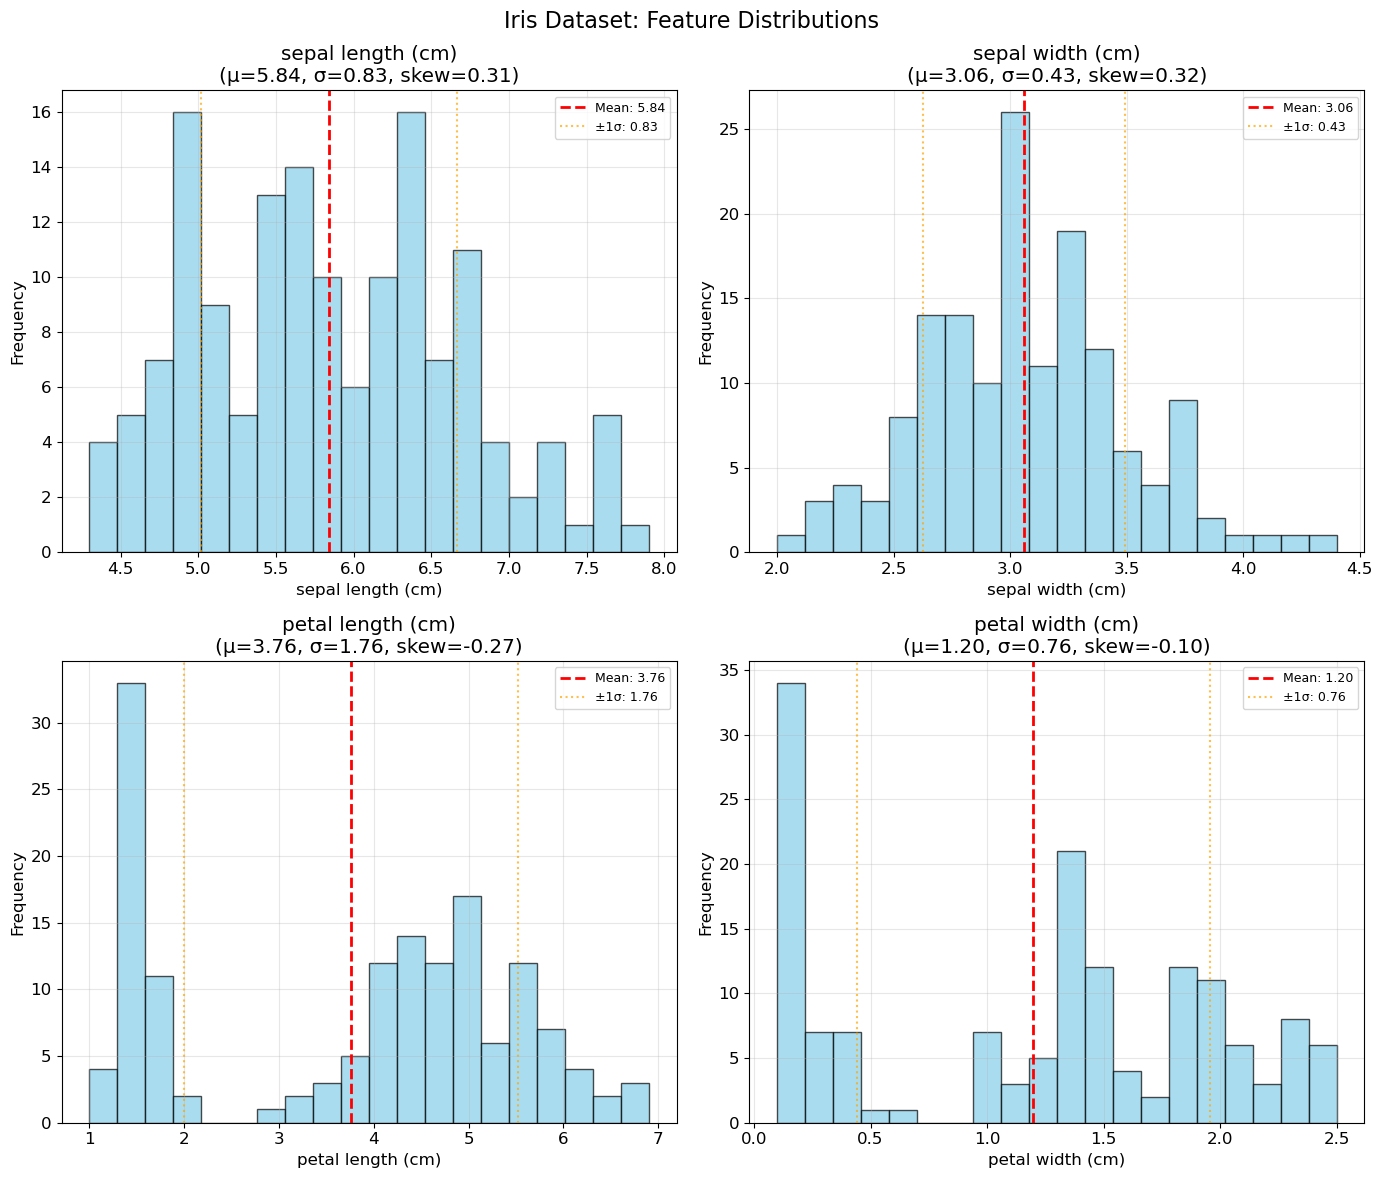

FEATURE DISTRIBUTION ANALYSIS
sepal length (cm):
  Range: [4.30, 7.90]
  Mean ± Std: 5.84 ± 0.83
  Skewness: 0.31 (approximately symmetric)

sepal width (cm):
  Range: [2.00, 4.40]
  Mean ± Std: 3.06 ± 0.43
  Skewness: 0.32 (approximately symmetric)

petal length (cm):
  Range: [1.00, 6.90]
  Mean ± Std: 3.76 ± 1.76
  Skewness: -0.27 (approximately symmetric)

petal width (cm):
  Range: [0.10, 2.50]
  Mean ± Std: 1.20 ± 0.76
  Skewness: -0.10 (approximately symmetric)



In [7]:
def plot_feature_distributions(X, feature_names, title="Feature Distributions"):
    """
    Create histogram plots for all features to visualize their distributions.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix
    feature_names : list of str
        Names of the features
    title : str, default="Feature Distributions"
        Overall title for the plot
    
    Returns:
    --------
    dict : Statistical information about each feature:
        - 'means': Mean values per feature
        - 'stds': Standard deviations per feature  
        - 'skewness': Skewness values per feature
        - 'ranges': Min-max ranges per feature
    
    Mathematical analysis:
    ---------------------
    For each feature j, computes:
    - μⱼ = (1/n) Σᵢ xᵢⱼ  (mean)
    - σⱼ = √[(1/(n-1)) Σᵢ (xᵢⱼ - μⱼ)²]  (standard deviation)
    - Skewness = E[(X-μ)³]/σ³  (distribution asymmetry measure)
    """
    n_features = X.shape[1]
    
    # Calculate grid dimensions
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))
    if n_features == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Statistical analysis results
    stats = {
        'means': [],
        'stds': [],
        'ranges': [],
        'skewness': []
    }
    
    for idx in range(n_features):
        row, col = idx // n_cols, idx % n_cols
        
        # Extract feature data
        feature_data = X[:, idx]
        
        # Calculate statistics
        mean_val = np.mean(feature_data)
        std_val = np.std(feature_data)
        min_val = np.min(feature_data)
        max_val = np.max(feature_data)
        
        # Calculate skewness (third moment)
        skewness = np.mean(((feature_data - mean_val) / std_val) ** 3)
        
        # Store statistics
        stats['means'].append(mean_val)
        stats['stds'].append(std_val)
        stats['ranges'].append((min_val, max_val))
        stats['skewness'].append(skewness)
        
        # Create histogram
        axes[row, col].hist(feature_data, bins=20, color='skyblue', 
                           edgecolor='black', alpha=0.7, density=False)
        
        # Add statistical lines
        axes[row, col].axvline(mean_val, color='red', linestyle='--', 
                              linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[row, col].axvline(mean_val - std_val, color='orange', linestyle=':', 
                              alpha=0.7, label=f'±1σ: {std_val:.2f}')
        axes[row, col].axvline(mean_val + std_val, color='orange', linestyle=':', 
                              alpha=0.7)
        
        # Formatting
        axes[row, col].set_title(f'{feature_names[idx]}\n(μ={mean_val:.2f}, σ={std_val:.2f}, skew={skewness:.2f})')
        axes[row, col].set_xlabel(feature_names[idx])
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].grid(axis='y', alpha=0.3)
        axes[row, col].legend(loc='upper right', fontsize=9)
    
    # Hide empty subplots
    for idx in range(n_features, n_rows * n_cols):
        row, col = idx // n_cols, idx % n_cols
        axes[row, col].set_visible(False)
    
    plt.suptitle(title, fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Print statistical summary
    print("="*60)
    print("FEATURE DISTRIBUTION ANALYSIS")
    print("="*60)
    
    for i, name in enumerate(feature_names):
        mean_val = stats['means'][i]
        std_val = stats['stds'][i]
        min_val, max_val = stats['ranges'][i]
        skew_val = stats['skewness'][i]
        
        print(f"{name}:")
        print(f"  Range: [{min_val:.2f}, {max_val:.2f}]")
        print(f"  Mean ± Std: {mean_val:.2f} ± {std_val:.2f}")
        print(f"  Skewness: {skew_val:.2f} {'(right-tailed)' if skew_val > 0.5 else '(left-tailed)' if skew_val < -0.5 else '(approximately symmetric)'}")
        print()
    
    return stats

# Visualize feature distributions for the Iris dataset
distribution_stats = plot_feature_distributions(X, feature_names, 
                                               title="Iris Dataset: Feature Distributions")

### 4.3 Scatter Plots: Exploring Feature Relationships and Class Separability

**Mathematical Foundation**:
A **scatter plot** visualizes the joint distribution of two features $(x_i, x_j)$:
- **X-axis**: Feature $i$ values
- **Y-axis**: Feature $j$ values  
- **Each point**: One data sample $(x_{k,i}, x_{k,j})$

**Correlation Analysis**:
The **Pearson correlation coefficient** measures linear relationship strength:
$$r_{ij} = \frac{\sum_{k=1}^n (x_{k,i} - \mu_i)(x_{k,j} - \mu_j)}{\sqrt{\sum_{k=1}^n (x_{k,i} - \mu_i)^2 \sum_{k=1}^n (x_{k,j} - \mu_j)^2}}$$

**Interpretation**:
- $r_{ij} = +1$: Perfect positive linear correlation
- $r_{ij} = 0$: No linear correlation (but nonlinear relationships may exist)
- $r_{ij} = -1$: Perfect negative linear correlation
- $|r_{ij}| > 0.7$: Strong correlation
- $|r_{ij}| < 0.3$: Weak correlation

**Class Separability Assessment**:
When points are colored by class, scatter plots reveal:
- **Linear separability**: Classes can be separated by a straight line
- **Cluster structure**: Distinct groups in feature space
- **Overlap regions**: Where classification will be difficult
- **Decision boundaries**: Where optimal separation might occur

**Feature Selection Insights**:
- **High between-class separation**: Good discriminative features
- **Low within-class variation**: Features with consistent values per class
- **Non-overlapping distributions**: Easier classification tasks

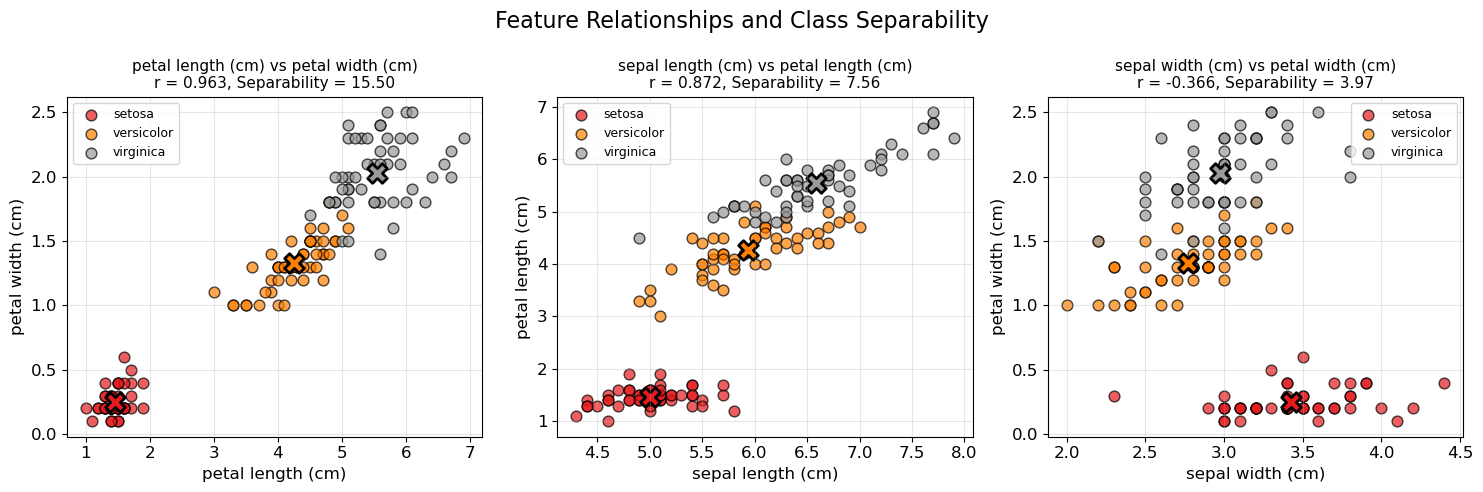

FEATURE RELATIONSHIP ANALYSIS
Correlation Matrix:
--------------------
sepal length (cm) (self): 1.000
sepal length (cm) vs sepal width (cm): -0.118 (Weak negative)
sepal length (cm) vs petal length (cm): 0.872 (Strong positive)
sepal length (cm) vs petal width (cm): 0.818 (Strong positive)
sepal width (cm) (self): 1.000
sepal width (cm) vs petal length (cm): -0.428 (Moderate negative)
sepal width (cm) vs petal width (cm): -0.366 (Moderate negative)
petal length (cm) (self): 1.000
petal length (cm) vs petal width (cm): 0.963 (Strong positive)
petal width (cm) (self): 1.000

Class Separability Scores:
-------------------------
petal length (cm) vs petal width (cm): 15.50 (Excellent)
sepal length (cm) vs petal length (cm): 7.56 (Excellent)
sepal width (cm) vs petal width (cm): 3.97 (Excellent)


In [8]:
def plot_feature_relationships(X, y, feature_names, target_names, 
                               feature_pairs=None, figsize=(15, 10)):
    """
    Create scatter plots to visualize relationships between feature pairs.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix
    y : numpy.ndarray of shape (n_samples,)
        Target labels
    feature_names : list of str
        Names of features
    target_names : list of str
        Names of target classes
    feature_pairs : list of tuples, optional
        Specific feature pairs to plot. If None, plots all combinations.
    figsize : tuple, default=(15, 10)
        Figure size for the plot
    
    Returns:
    --------
    dict : Correlation analysis results:
        - 'correlation_matrix': Pearson correlation coefficients
        - 'separability_scores': Class separability measures per feature pair
    
    Mathematical analysis:
    ---------------------
    Computes Pearson correlation coefficient:
    r_ij = Σ(x_i - μ_i)(x_j - μ_j) / √[Σ(x_i - μ_i)² Σ(x_j - μ_j)²]
    """
    n_features = X.shape[1]
    n_classes = len(target_names)
    
    # Define feature pairs to plot
    if feature_pairs is None:
        # Select most interesting pairs (avoid all combinations for large datasets)
        if n_features <= 4:
            feature_pairs = [(i, j) for i in range(n_features) for j in range(i+1, n_features)]
        else:
            # For larger datasets, select a subset of interesting pairs
            feature_pairs = [(0, 1), (0, 2), (1, 3), (2, 3)]
            feature_pairs = [(i, j) for i, j in feature_pairs if i < n_features and j < n_features]
    
    n_pairs = len(feature_pairs)
    
    # Calculate grid dimensions
    n_cols = min(3, n_pairs)
    n_rows = (n_pairs + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    if n_pairs == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten() if n_pairs > 1 else [axes]
    
    # Color scheme for classes
    colors = plt.cm.Set1(np.linspace(0, 1, n_classes))
    
    correlation_matrix = np.corrcoef(X.T)
    separability_scores = {}
    
    for idx, (feat_i, feat_j) in enumerate(feature_pairs):
        ax = axes[idx]
        
        # Extract features
        x_data = X[:, feat_i]
        y_data = X[:, feat_j]
        
        # Calculate correlation
        correlation = correlation_matrix[feat_i, feat_j]
        
        # Plot points for each class
        class_centroids = []
        for class_id in range(n_classes):
            mask = y == class_id
            if np.any(mask):
                x_class = x_data[mask]
                y_class = y_data[mask]
                
                ax.scatter(x_class, y_class,
                          c=[colors[class_id]], 
                          label=target_names[class_id],
                          alpha=0.7, 
                          edgecolors='black',
                          s=60)
                
                # Calculate class centroid
                centroid = (np.mean(x_class), np.mean(y_class))
                class_centroids.append(centroid)
                
                # Mark centroid
                ax.scatter(centroid[0], centroid[1],
                          c=[colors[class_id]], 
                          marker='X', s=200, 
                          edgecolors='black', linewidth=2)
        
        # Calculate class separability (between-class to within-class variance ratio)
        between_class_var = np.var([centroid[0] for centroid in class_centroids]) + \
                           np.var([centroid[1] for centroid in class_centroids])
        
        within_class_var = 0
        for class_id in range(n_classes):
            mask = y == class_id
            if np.any(mask):
                within_class_var += np.var(x_data[mask]) + np.var(y_data[mask])
        within_class_var /= n_classes
        
        separability = between_class_var / (within_class_var + 1e-8)  # Add small epsilon
        separability_scores[f"{feature_names[feat_i]} vs {feature_names[feat_j]}"] = separability
        
        # Formatting
        ax.set_xlabel(feature_names[feat_i], fontsize=12)
        ax.set_ylabel(feature_names[feat_j], fontsize=12)
        ax.set_title(f'{feature_names[feat_i]} vs {feature_names[feat_j]}\n' +
                    f'r = {correlation:.3f}, Separability = {separability:.2f}', fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best', fontsize=9)
    
    # Hide empty subplots
    for idx in range(n_pairs, len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('Feature Relationships and Class Separability', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Print analysis results
    print("="*60)
    print("FEATURE RELATIONSHIP ANALYSIS")
    print("="*60)
    
    print("Correlation Matrix:")
    print("-" * 20)
    for i, name_i in enumerate(feature_names):
        for j, name_j in enumerate(feature_names):
            if i <= j:
                corr_val = correlation_matrix[i, j]
                if i == j:
                    print(f"{name_i} (self): {corr_val:.3f}")
                else:
                    strength = "Strong" if abs(corr_val) > 0.7 else "Moderate" if abs(corr_val) > 0.3 else "Weak"
                    direction = "positive" if corr_val > 0 else "negative"
                    print(f"{name_i} vs {name_j}: {corr_val:.3f} ({strength} {direction})")
    
    print(f"\nClass Separability Scores:")
    print("-" * 25)
    for pair_name, score in separability_scores.items():
        quality = "Excellent" if score > 2 else "Good" if score > 1 else "Fair" if score > 0.5 else "Poor"
        print(f"{pair_name}: {score:.2f} ({quality})")
    
    return {
        'correlation_matrix': correlation_matrix,
        'separability_scores': separability_scores
    }

# Analyze feature relationships in the Iris dataset
relationship_analysis = plot_feature_relationships(X, y, feature_names, target_names,
                                                  feature_pairs=[(2, 3), (0, 2), (1, 3)],
                                                  figsize=(15, 5))

### 4.4 Image Data Visualization: Understanding Visual Patterns

**Pixel Intensity Analysis**:
For grayscale image $\mathbf{I} \in \mathbb{R}^{H \times W}$, we can analyze:

**Global Statistics**:
- **Mean intensity**: $\mu_I = \frac{1}{HW} \sum_{i=1}^H \sum_{j=1}^W I_{i,j}$
- **Standard deviation**: $\sigma_I = \sqrt{\frac{1}{HW-1} \sum_{i=1}^H \sum_{j=1}^W (I_{i,j} - \mu_I)^2}$
- **Dynamic range**: $[I_{min}, I_{max}]$ where $I_{min} = \min_{i,j} I_{i,j}$, $I_{max} = \max_{i,j} I_{i,j}$

**Histogram Analysis for Images**:
The **pixel intensity histogram** shows the distribution of brightness values:
- **Dark images**: Histogram concentrated at low values (0-100)
- **Bright images**: Histogram concentrated at high values (150-255)
- **High contrast**: Histogram spread across full range
- **Low contrast**: Histogram concentrated in narrow range

**Visual Pattern Recognition**:
- **Texture**: Repeating local patterns (measured by co-occurrence matrices)
- **Edges**: Sharp intensity transitions (detected by gradients)
- **Shapes**: Geometric structures (circles, lines, corners)
- **Global structure**: Overall composition and layout

**Class-wise Analysis**:
For datasets like MNIST, each digit class has characteristic patterns:
- **Digit 0**: Circular structure, hollow center
- **Digit 1**: Vertical lines, minimal width
- **Digit 8**: Two loops, complex topology
- **Within-class variation**: Different handwriting styles
- **Between-class similarity**: Digits 6 and 9 are similar when rotated

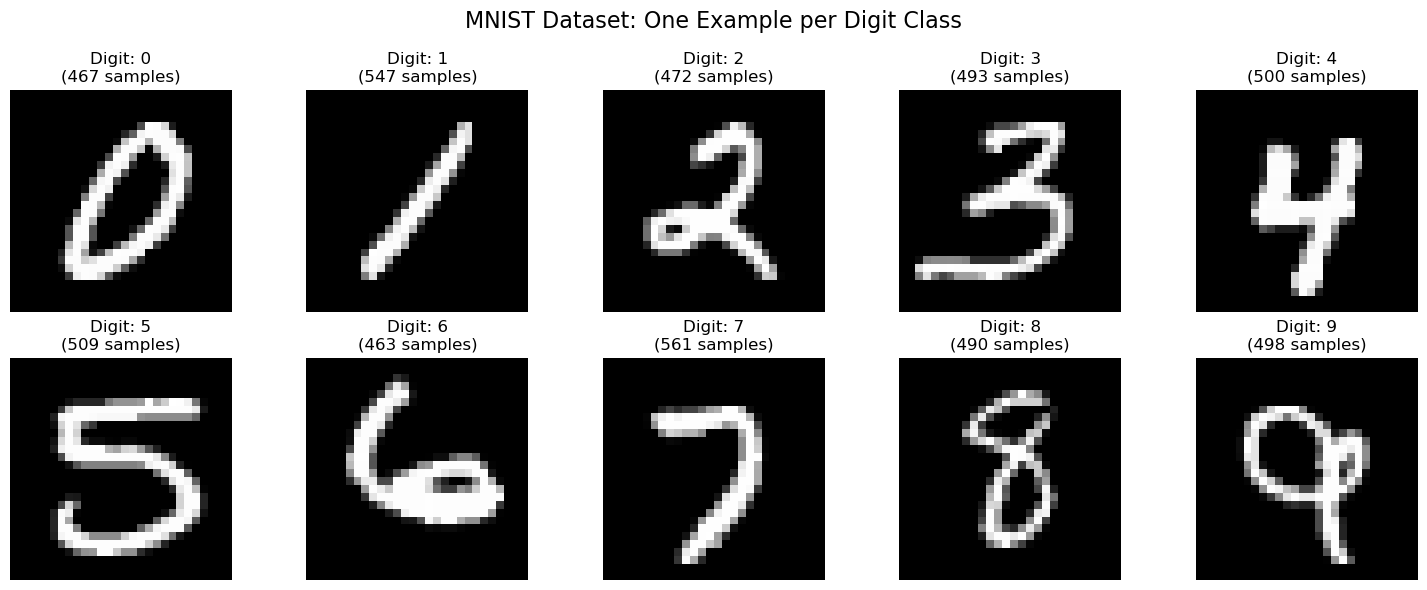

CLASS DISTRIBUTION ANALYSIS:
------------------------------
Digit 0:  467 samples (  9.3%)
Digit 1:  547 samples ( 10.9%)
Digit 2:  472 samples (  9.4%)
Digit 3:  493 samples (  9.9%)
Digit 4:  500 samples ( 10.0%)
Digit 5:  509 samples ( 10.2%)
Digit 6:  463 samples (  9.3%)
Digit 7:  561 samples ( 11.2%)
Digit 8:  490 samples (  9.8%)
Digit 9:  498 samples ( 10.0%)


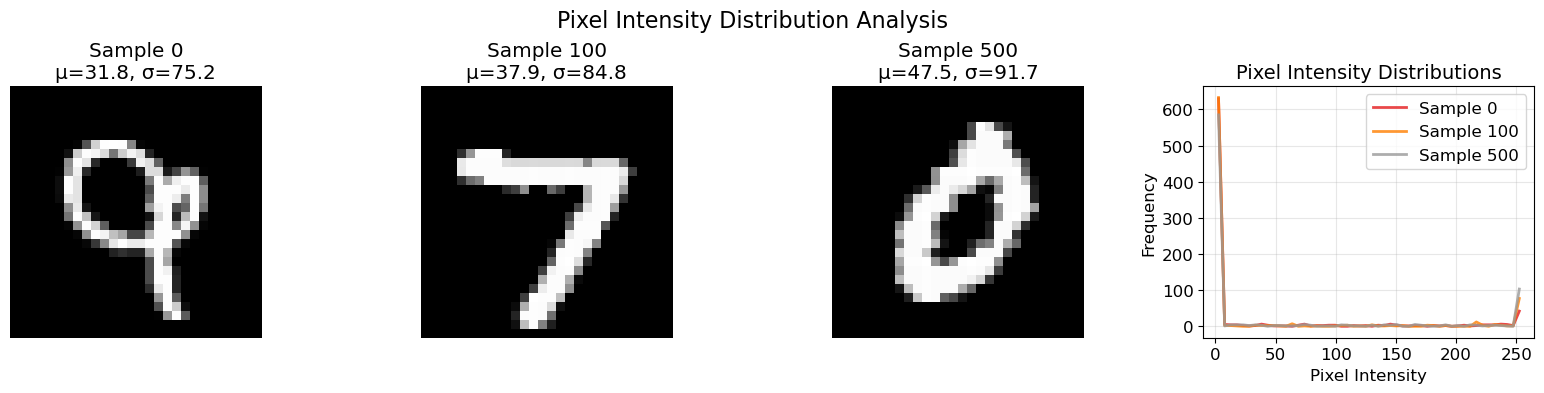

PIXEL INTENSITY STATISTICS:
-----------------------------------
Sample 0:
  Intensity range: [0, 255]
  Mean ± Std: 31.8 ± 75.2
  Dynamic range: 255 levels
  Characteristics: Dark, High contrast

Sample 100:
  Intensity range: [0, 255]
  Mean ± Std: 37.9 ± 84.8
  Dynamic range: 255 levels
  Characteristics: Dark, High contrast

Sample 500:
  Intensity range: [0, 255]
  Mean ± Std: 47.5 ± 91.7
  Dynamic range: 255 levels
  Characteristics: Dark, High contrast



In [9]:
def visualize_digit_examples(images, labels, title="Digit Examples"):
    """
    Display one example of each digit class (0-9) from the dataset.
    
    Parameters:
    -----------
    images : numpy.ndarray of shape (n_samples, height, width)
        Array of digit images
    labels : numpy.ndarray of shape (n_samples,)
        Corresponding digit labels (0-9)
    title : str, default="Digit Examples"
        Title for the visualization
    
    Returns:
    --------
    dict : Information about the examples:
        - 'example_indices': Index of the example used for each digit
        - 'class_counts': Number of samples per digit class
    
    Educational purpose:
    ------------------
    Demonstrates class diversity and helps understand the classification task.
    Each digit class has distinct visual patterns that algorithms must learn.
    """
    unique_digits = np.unique(labels)
    n_digits = len(unique_digits)
    
    # Calculate grid dimensions
    n_cols = 5
    n_rows = (n_digits + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
    axes = axes.flatten() if n_digits > 1 else [axes]
    
    example_indices = {}
    class_counts = {}
    
    for i, digit in enumerate(unique_digits):
        # Find first occurrence of this digit
        digit_indices = np.where(labels == digit)[0]
        example_idx = digit_indices[0] if len(digit_indices) > 0 else None
        
        example_indices[digit] = example_idx
        class_counts[digit] = len(digit_indices)
        
        if example_idx is not None:
            axes[i].imshow(images[example_idx], cmap='gray', vmin=0, vmax=255)
            axes[i].set_title(f'Digit: {digit}\n({len(digit_indices)} samples)', fontsize=12)
        else:
            axes[i].text(0.5, 0.5, f'No samples\nfor digit {digit}', 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f'Digit: {digit}\n(0 samples)', fontsize=12)
        
        axes[i].axis('off')
    
    # Hide empty subplots
    for i in range(n_digits, len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle(title, fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Print class distribution
    print("CLASS DISTRIBUTION ANALYSIS:")
    print("-" * 30)
    total_samples = sum(class_counts.values())
    for digit in sorted(class_counts.keys()):
        count = class_counts[digit]
        percentage = (count / total_samples) * 100 if total_samples > 0 else 0
        print(f"Digit {digit}: {count:4d} samples ({percentage:5.1f}%)")
    
    return {
        'example_indices': example_indices,
        'class_counts': class_counts
    }

def analyze_pixel_intensity_distribution(images, sample_indices=None, title="Pixel Intensity Analysis"):
    """
    Analyze and visualize pixel intensity distributions in images.
    
    Parameters:
    -----------
    images : numpy.ndarray of shape (n_samples, height, width)
        Array of images
    sample_indices : list or None, default=None
        Specific image indices to analyze. If None, analyzes first image.
    title : str, default="Pixel Intensity Analysis"
        Title for the visualization
    
    Returns:
    --------
    dict : Statistical analysis results:
        - 'mean_intensities': Mean pixel intensity per image
        - 'std_intensities': Standard deviation per image
        - 'intensity_ranges': Min-max ranges per image
        - 'histogram_data': Histogram data for visualization
    
    Mathematical analysis:
    ---------------------
    For each image I ∈ ℝ^(H×W), computes:
    - μ_I = (1/HW) Σᵢⱼ I(i,j)  (mean intensity)
    - σ_I = √[(1/HW-1) Σᵢⱼ (I(i,j) - μ_I)²]  (intensity variation)
    """
    if sample_indices is None:
        sample_indices = [0]
    
    n_samples = len(sample_indices)
    
    # Calculate grid for subplots
    n_cols = min(3, n_samples)
    n_rows = (n_samples + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols + 1, figsize=(16, 4 * n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    analysis_results = {
        'mean_intensities': [],
        'std_intensities': [],
        'intensity_ranges': [],
        'histogram_data': []
    }
    
    for idx, sample_idx in enumerate(sample_indices):
        row = idx // n_cols
        col = idx % n_cols
        
        # Extract image and flatten for analysis
        image = images[sample_idx]
        pixels = image.flatten()
        
        # Statistical analysis
        mean_intensity = np.mean(pixels)
        std_intensity = np.std(pixels)
        min_intensity = np.min(pixels)
        max_intensity = np.max(pixels)
        
        analysis_results['mean_intensities'].append(mean_intensity)
        analysis_results['std_intensities'].append(std_intensity)
        analysis_results['intensity_ranges'].append((min_intensity, max_intensity))
        
        # Display original image
        axes[row, col].imshow(image, cmap='gray', vmin=0, vmax=255)
        axes[row, col].set_title(f'Sample {sample_idx}\nμ={mean_intensity:.1f}, σ={std_intensity:.1f}')
        axes[row, col].axis('off')
        
        # Create histogram
        hist_data, bin_edges = np.histogram(pixels, bins=50, range=(0, 255))
        analysis_results['histogram_data'].append((hist_data, bin_edges))
    
    # Combined histogram plot
    axes[0, -1].set_title('Pixel Intensity Distributions', fontsize=14)
    colors = plt.cm.Set1(np.linspace(0, 1, n_samples))
    
    for idx, sample_idx in enumerate(sample_indices):
        hist_data, bin_edges = analysis_results['histogram_data'][idx]
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        axes[0, -1].plot(bin_centers, hist_data, color=colors[idx], 
                        label=f'Sample {sample_idx}', linewidth=2, alpha=0.8)
    
    axes[0, -1].set_xlabel('Pixel Intensity', fontsize=12)
    axes[0, -1].set_ylabel('Frequency', fontsize=12)
    axes[0, -1].grid(axis='y', alpha=0.3)
    axes[0, -1].legend()
    
    # Hide empty subplots
    for row in range(n_rows):
        for col in range(n_cols, len(axes[row]) - 1):
            if row * n_cols + col >= n_samples:
                axes[row, col].set_visible(False)
    
    plt.suptitle(title, fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Print statistical summary
    print("PIXEL INTENSITY STATISTICS:")
    print("-" * 35)
    for idx, sample_idx in enumerate(sample_indices):
        mean_val = analysis_results['mean_intensities'][idx]
        std_val = analysis_results['std_intensities'][idx]
        min_val, max_val = analysis_results['intensity_ranges'][idx]
        
        print(f"Sample {sample_idx}:")
        print(f"  Intensity range: [{min_val:.0f}, {max_val:.0f}]")
        print(f"  Mean ± Std: {mean_val:.1f} ± {std_val:.1f}")
        print(f"  Dynamic range: {max_val - min_val:.0f} levels")
        
        # Intensity categorization
        if mean_val < 85:
            brightness = "Dark"
        elif mean_val < 170:
            brightness = "Medium"
        else:
            brightness = "Bright"
        
        if std_val < 30:
            contrast = "Low contrast"
        elif std_val < 70:
            contrast = "Medium contrast"
        else:
            contrast = "High contrast"
        
        print(f"  Characteristics: {brightness}, {contrast}")
        print()
    
    return analysis_results

# Visualize examples of each digit class
digit_examples = visualize_digit_examples(images, labels, 
                                         title="MNIST Dataset: One Example per Digit Class")

# Analyze pixel intensity distributions for sample images
intensity_analysis = analyze_pixel_intensity_distribution(images, 
                                                        sample_indices=[0, 100, 500], 
                                                        title="Pixel Intensity Distribution Analysis")

## 5. Data Preprocessing: Mathematical Transformations for Machine Learning

### 5.1 The Mathematics of Feature Scaling

**Why do we need preprocessing?**
Different features often have vastly different scales:
- Iris sepal length: $[4.3, 7.9]$ cm
- Iris petal width: $[0.1, 2.5]$ cm
- Image pixels: $[0, 255]$

**Mathematical Problem**: Many algorithms use **distance metrics** (e.g., Euclidean distance):
$$d(\mathbf{x}_i, \mathbf{x}_j) = ||\mathbf{x}_i - \mathbf{x}_j||_2 = \sqrt{\sum_{k=1}^d (x_{i,k} - x_{j,k})^2}$$

**Without preprocessing**: Features with larger scales dominate the distance calculation!

**Example**: For two iris samples:
- $\mathbf{x}_1 = [5.0, 3.0, 1.5, 0.2]$ (sepal_len, sepal_wid, petal_len, petal_wid)
- $\mathbf{x}_2 = [5.1, 3.1, 1.4, 0.3]$

$$d(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(5.0-5.1)^2 + (3.0-3.1)^2 + (1.5-1.4)^2 + (0.2-0.3)^2}$$
$$= \sqrt{0.01 + 0.01 + 0.01 + 0.01} = 0.2$$

Sepal measurements dominate despite petal measurements being equally informative!

### 5.2 Min-Max Normalization: Linear Scaling to Fixed Range

**Mathematical Formula**:
$$x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

**Properties**:
- **Output range**: $[0, 1]$ (always)
- **Linear transformation**: Preserves relative distances
- **Outlier sensitive**: Extreme values affect $x_{min}$ and $x_{max}$

**Vector Form**: For feature vector $\mathbf{x} = (x_1, x_2, ..., x_n)$:
$$\mathbf{x}_{norm} = \frac{\mathbf{x} - x_{min} \mathbf{1}}{\max(\mathbf{x}) - \min(\mathbf{x})}$$

where $\mathbf{1}$ is the vector of ones.

**When to use**:
- **Neural networks** with sigmoid/tanh activations (bounded inputs work well)
- **Image processing** (pixel values naturally in [0,1])
- **When you need bounded features** for algorithm constraints
- **When original distribution shape should be preserved**

**Limitations**:
- **Sensitive to outliers**: One extreme value affects all other values
- **Not robust**: New data might fall outside [0,1]
- **Assumes bounded distribution**: Works poorly with open-ended distributions

MANUAL MIN-MAX NORMALIZATION DEMONSTRATION
Target feature: petal length (cm)
Original range: [1.000, 6.900] (range = 5.900)


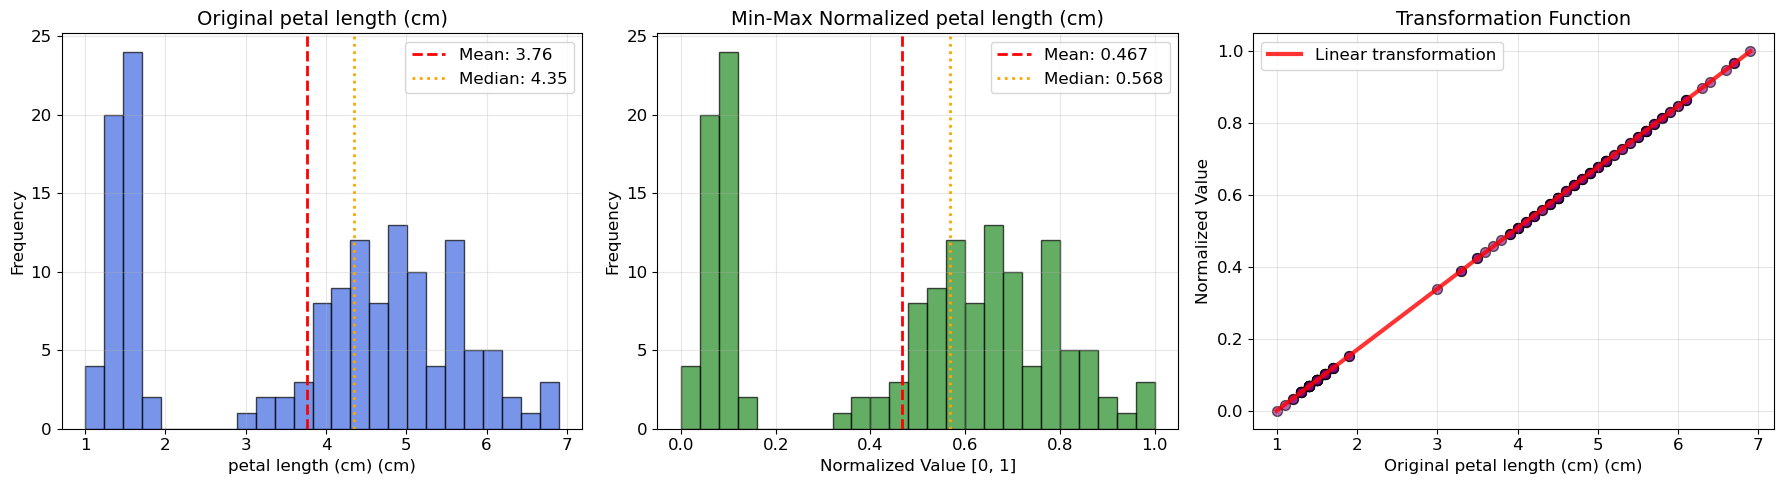


STATISTICAL ANALYSIS:
------------------------------
Statistic    Original     Normalized   Change         
------------------------------------------------------------
Mean         3.758        0.467        -87.6%         
Std          1.759        0.298        -83.1%         
Min          1.000        0.000        Fixed to 0.0   
Max          6.900        1.000        Fixed to 1.0   
Median       4.350        0.568        -86.9%         

KEY PROPERTIES:
--------------------
• Transformation is LINEAR: y = (x - 1.000) / 5.900
• Range reduction: 5.900 → 1.000 (factor of 5.90)
• Shape preservation: Distribution shape unchanged
• Outlier sensitivity: Range determined by min/max values


In [10]:
def demonstrate_manual_minmax_normalization(X, feature_names, feature_idx=2):
    """
    Demonstrate manual Min-Max normalization with mathematical analysis.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix
    feature_names : list of str
        Names of features
    feature_idx : int, default=2
        Index of feature to normalize
    
    Returns:
    --------
    dict : Results containing:
        - 'original_values': Original feature values
        - 'normalized_values': Min-max normalized values
        - 'min_val': Minimum value used for normalization
        - 'max_val': Maximum value used for normalization
        - 'statistics': Before/after statistics
    
    Mathematical operation:
    ----------------------
    x_norm = (x - x_min) / (x_max - x_min)
    
    Properties:
    ----------
    - Output range: [0, 1] (guaranteed)
    - Linear transformation: preserves relative distances
    - Sensitive to outliers: extreme values determine scale
    """
    print("="*70)
    print("MANUAL MIN-MAX NORMALIZATION DEMONSTRATION")
    print("="*70)
    
    # Extract feature data
    feature_name = feature_names[feature_idx]
    values = X[:, feature_idx]
    
    # Calculate normalization parameters
    min_val = np.min(values)
    max_val = np.max(values)
    range_val = max_val - min_val
    
    print(f"Target feature: {feature_name}")
    print(f"Original range: [{min_val:.3f}, {max_val:.3f}] (range = {range_val:.3f})")
    
    # Apply Min-Max normalization formula
    normalized_values = (values - min_val) / range_val
    
    # Calculate statistics
    original_stats = {
        'mean': np.mean(values),
        'std': np.std(values),
        'min': min_val,
        'max': max_val,
        'median': np.median(values)
    }
    
    normalized_stats = {
        'mean': np.mean(normalized_values),
        'std': np.std(normalized_values),
        'min': np.min(normalized_values),
        'max': np.max(normalized_values),
        'median': np.median(normalized_values)
    }
    
    # Create visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Original distribution
    axes[0].hist(values, bins=25, color='royalblue', alpha=0.7, edgecolor='black')
    axes[0].axvline(original_stats['mean'], color='red', linestyle='--', linewidth=2, 
                   label=f"Mean: {original_stats['mean']:.2f}")
    axes[0].axvline(original_stats['median'], color='orange', linestyle=':', linewidth=2,
                   label=f"Median: {original_stats['median']:.2f}")
    axes[0].set_title(f'Original {feature_name}', fontsize=14)
    axes[0].set_xlabel(f'{feature_name} (cm)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Normalized distribution
    axes[1].hist(normalized_values, bins=25, color='forestgreen', alpha=0.7, edgecolor='black')
    axes[1].axvline(normalized_stats['mean'], color='red', linestyle='--', linewidth=2,
                   label=f"Mean: {normalized_stats['mean']:.3f}")
    axes[1].axvline(normalized_stats['median'], color='orange', linestyle=':', linewidth=2,
                   label=f"Median: {normalized_stats['median']:.3f}")
    axes[1].set_title(f'Min-Max Normalized {feature_name}', fontsize=14)
    axes[1].set_xlabel('Normalized Value [0, 1]', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    # Transformation visualization (scatter plot)
    axes[2].scatter(values, normalized_values, alpha=0.6, color='purple', s=50, edgecolors='black')
    axes[2].plot([min_val, max_val], [0, 1], 'r-', linewidth=3, alpha=0.8, 
                label='Linear transformation')
    axes[2].set_xlabel(f'Original {feature_name} (cm)', fontsize=12)
    axes[2].set_ylabel('Normalized Value', fontsize=12)
    axes[2].set_title('Transformation Function', fontsize=14)
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print(f"\nSTATISTICAL ANALYSIS:")
    print("-" * 30)
    print(f"{'Statistic':<12} {'Original':<12} {'Normalized':<12} {'Change':<15}")
    print("-" * 60)
    
    stats_names = ['mean', 'std', 'min', 'max', 'median']
    for stat in stats_names:
        orig_val = original_stats[stat]
        norm_val = normalized_stats[stat]
        
        if stat in ['min', 'max']:
            change = f"Fixed to {norm_val:.1f}"
        else:
            # Calculate relative change
            if orig_val != 0:
                pct_change = ((norm_val - orig_val) / orig_val) * 100
                change = f"{pct_change:+.1f}%"
            else:
                change = "N/A"
        
        print(f"{stat.capitalize():<12} {orig_val:<12.3f} {norm_val:<12.3f} {change:<15}")
    
    print(f"\nKEY PROPERTIES:")
    print("-" * 20)
    print(f"• Transformation is LINEAR: y = (x - {min_val:.3f}) / {range_val:.3f}")
    print(f"• Range reduction: {range_val:.3f} → 1.000 (factor of {range_val:.2f})")
    print(f"• Shape preservation: Distribution shape unchanged")
    print(f"• Outlier sensitivity: Range determined by min/max values")
    
    # Check for potential issues
    if range_val < 0.001:
        print(f"⚠️  WARNING: Very small range ({range_val:.6f}) - feature may be near-constant")
    
    return {
        'original_values': values,
        'normalized_values': normalized_values,
        'min_val': min_val,
        'max_val': max_val,
        'range_val': range_val,
        'original_statistics': original_stats,
        'normalized_statistics': normalized_stats
    }

# Demonstrate manual Min-Max normalization
minmax_results = demonstrate_manual_minmax_normalization(X, feature_names, feature_idx=2)

### 5.3 Z-Score Standardization: Statistical Normalization

**Mathematical Formula**:
$$x_{standardized} = \frac{x - \mu}{\sigma}$$

where:
- $\mu = \frac{1}{n}\sum_{i=1}^n x_i$ (sample mean)
- $\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i - \mu)^2}$ (sample standard deviation)

**Properties**:
- **Output distribution**: Mean = 0, Standard deviation = 1
- **Output range**: $(-\infty, +\infty)$ (unbounded)
- **Assumes normality**: Works best when data is approximately Gaussian
- **Preserves shape**: Maintains the distribution's shape

**Probabilistic Interpretation**:
If $X \sim \mathcal{N}(\mu, \sigma^2)$, then $Z = \frac{X - \mu}{\sigma} \sim \mathcal{N}(0, 1)$

The **standardized values** represent how many standard deviations away from the mean:
- $z = 0$: At the mean
- $z = 1$: One standard deviation above the mean
- $z = -2$: Two standard deviations below the mean
- $|z| > 2$: Potential outlier (occurs in ~5% of normal data)
- $|z| > 3$: Strong outlier (occurs in ~0.3% of normal data)

**When to use Z-score standardization**:
- **Algorithms assuming normality**: Linear regression, LDA, Naive Bayes
- **Distance-based algorithms**: KNN, K-means, SVM with RBF kernel
- **When features have different units**: Mixing categorical counts with continuous measurements
- **Gradient-based optimization**: Helps neural network training convergence

**Mathematical advantages**:
- **Scale invariant**: Relative relationships preserved
- **Robust to linear transformations**: Adding constants or scaling doesn't change relative z-scores
- **Interpretable**: Values have statistical meaning (standard deviations from mean)

**Limitations**:
- **Sensitive to outliers**: Extreme values affect both $\mu$ and $\sigma$
- **Assumes approximate normality**: Less effective for highly skewed distributions
- **Unbounded output**: Some algorithms need bounded inputs

MANUAL Z-SCORE STANDARDIZATION DEMONSTRATION
Target feature: petal length (cm)
Original distribution: μ = 3.758, σ = 1.765


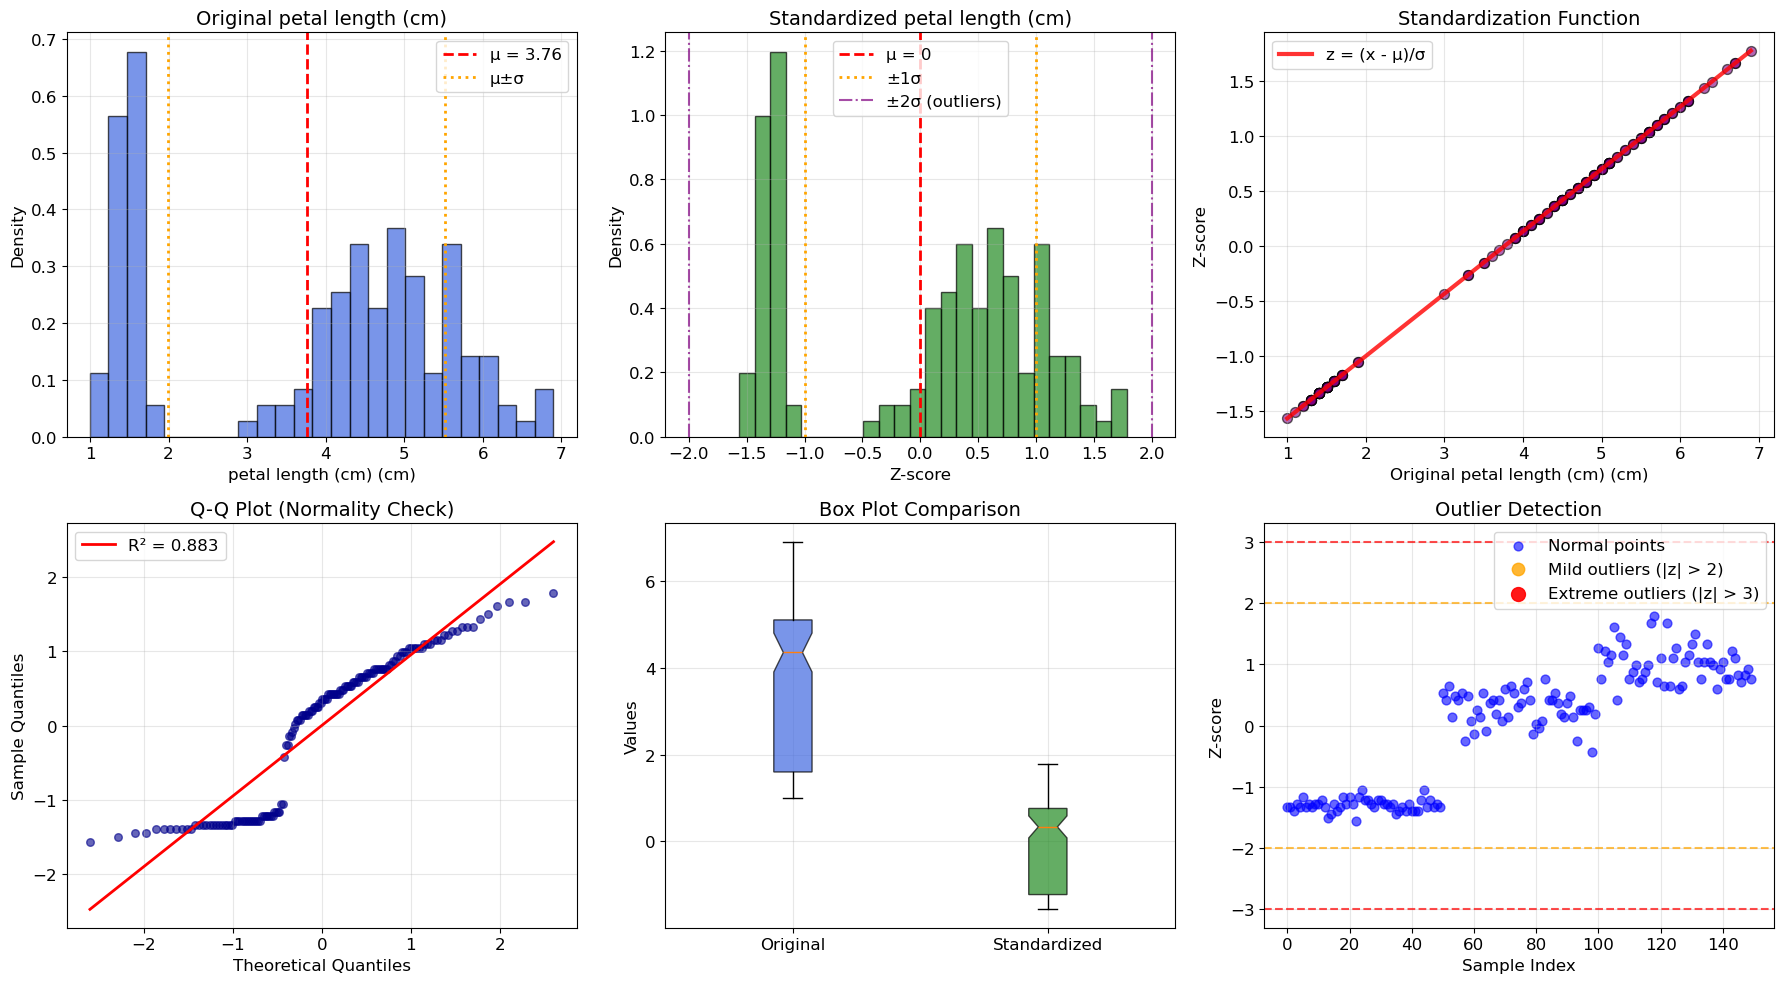


STATISTICAL TRANSFORMATION ANALYSIS:
--------------------------------------------------
Statistic    Original     Standardized Expected    
------------------------------------------------------------
Mean         3.758        -0.000       0.0         
Std          1.765        1.000        1.0         
Skewness     -0.269       -0.269       preserved   
Kurtosis     -1.417       -1.417       preserved   

OUTLIER ANALYSIS:
--------------------
• Mild outliers (|z| > 2.0): 0 (0.0%)
• Extreme outliers (|z| > 3.0): 0 (0.0%)
• Expected mild outliers (normal dist): ~7.5 (5%)
• Expected extreme outliers (normal dist): ~0.5 (0.3%)

DISTRIBUTION PROPERTIES:
-------------------------
• Skewness: -0.269 (symmetric)
• Kurtosis: -1.417 (light tails)
• Normality (Q-Q R²): 0.883 (Poor fit)


In [17]:
def demonstrate_manual_standardization(X, feature_names, feature_idx=2):
    """
    Demonstrate manual Z-score standardization with statistical analysis.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix
    feature_names : list of str
        Names of features  
    feature_idx : int, default=2
        Index of feature to standardize
    
    Returns:
    --------
    dict : Results containing:
        - 'original_values': Original feature values
        - 'standardized_values': Z-score standardized values
        - 'mean_val': Mean used for standardization
        - 'std_val': Standard deviation used for standardization
        - 'statistics': Before/after statistics
        - 'outlier_analysis': Outlier detection results
    
    Mathematical operation:
    ----------------------
    z = (x - μ) / σ
    where μ = sample mean, σ = sample standard deviation
    
    Properties:
    ----------
    - Output mean: 0 (exactly)
    - Output std: 1 (exactly)
    - Unbounded range: (-∞, +∞)
    - Preserves distribution shape
    """
    print("="*70)
    print("MANUAL Z-SCORE STANDARDIZATION DEMONSTRATION")
    print("="*70)
    
    # Extract feature data
    feature_name = feature_names[feature_idx]
    values = X[:, feature_idx]
    
    # Calculate standardization parameters
    mean_val = np.mean(values)
    std_val = np.std(values, ddof=1)  # Sample standard deviation
    
    print(f"Target feature: {feature_name}")
    print(f"Original distribution: μ = {mean_val:.3f}, σ = {std_val:.3f}")
    
    # Apply Z-score standardization formula
    standardized_values = (values - mean_val) / std_val
    
    # Calculate comprehensive statistics
    original_stats = {
        'mean': mean_val,
        'std': std_val,
        'min': np.min(values),
        'max': np.max(values),
        'median': np.median(values),
        'q25': np.percentile(values, 25),
        'q75': np.percentile(values, 75),
        'skewness': np.mean(((values - mean_val) / std_val) ** 3),
        'kurtosis': np.mean(((values - mean_val) / std_val) ** 4) - 3
    }
    
    standardized_stats = {
        'mean': np.mean(standardized_values),
        'std': np.std(standardized_values, ddof=1),
        'min': np.min(standardized_values),
        'max': np.max(standardized_values),
        'median': np.median(standardized_values),
        'q25': np.percentile(standardized_values, 25),
        'q75': np.percentile(standardized_values, 75),
        'skewness': np.mean(standardized_values ** 3),
        'kurtosis': np.mean(standardized_values ** 4) - 3
    }
    
    # Outlier analysis using z-scores
    outlier_threshold = 2.0  # Common threshold for outliers
    outliers_mild = np.abs(standardized_values) > 2.0  # 2 standard deviations
    outliers_extreme = np.abs(standardized_values) > 3.0  # 3 standard deviations
    
    outlier_analysis = {
        'mild_outliers': np.sum(outliers_mild),
        'extreme_outliers': np.sum(outliers_extreme),
        'mild_percentage': (np.sum(outliers_mild) / len(values)) * 100,
        'extreme_percentage': (np.sum(outliers_extreme) / len(values)) * 100
    }
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # Original distribution
    axes[0, 0].hist(values, bins=25, color='royalblue', alpha=0.7, edgecolor='black', density=True)
    axes[0, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'μ = {mean_val:.2f}')
    axes[0, 0].axvline(mean_val - std_val, color='orange', linestyle=':', linewidth=2, label=f'μ±σ')
    axes[0, 0].axvline(mean_val + std_val, color='orange', linestyle=':', linewidth=2)
    axes[0, 0].set_title(f'Original {feature_name}', fontsize=14)
    axes[0, 0].set_xlabel(f'{feature_name} (cm)', fontsize=12)
    axes[0, 0].set_ylabel('Density', fontsize=12)
    axes[0, 0].legend()
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Standardized distribution
    axes[0, 1].hist(standardized_values, bins=25, color='forestgreen', alpha=0.7, edgecolor='black', density=True)
    axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='μ = 0')
    axes[0, 1].axvline(-1, color='orange', linestyle=':', linewidth=2, label='±1σ')
    axes[0, 1].axvline(1, color='orange', linestyle=':', linewidth=2)
    axes[0, 1].axvline(-2, color='purple', linestyle='-.', alpha=0.7, label='±2σ (outliers)')
    axes[0, 1].axvline(2, color='purple', linestyle='-.', alpha=0.7)
    axes[0, 1].set_title(f'Standardized {feature_name}', fontsize=14)
    axes[0, 1].set_xlabel('Z-score', fontsize=12)
    axes[0, 1].set_ylabel('Density', fontsize=12)
    axes[0, 1].legend()
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Transformation function
    axes[0, 2].scatter(values, standardized_values, alpha=0.6, color='purple', s=50, edgecolors='black')
    # Plot transformation line
    x_range = np.linspace(values.min(), values.max(), 100)
    y_range = (x_range - mean_val) / std_val
    axes[0, 2].plot(x_range, y_range, 'r-', linewidth=3, alpha=0.8, label='z = (x - μ)/σ')
    axes[0, 2].set_xlabel(f'Original {feature_name} (cm)', fontsize=12)
    axes[0, 2].set_ylabel('Z-score', fontsize=12)
    axes[0, 2].set_title('Standardization Function', fontsize=14)
    axes[0, 2].grid(True, alpha=0.3)
    axes[0, 2].legend()
    
    # Q-Q plot (approximate normality check)
    from scipy import stats
    (osm, osr), (slope, intercept, r) = stats.probplot(standardized_values, dist="norm", plot=None)
    axes[1, 0].scatter(osm, osr, alpha=0.6, color='darkblue', s=30)
    axes[1, 0].plot(osm, slope * osm + intercept, 'r-', linewidth=2, 
                   label=f'R² = {r**2:.3f}')
    axes[1, 0].set_xlabel('Theoretical Quantiles', fontsize=12)
    axes[1, 0].set_ylabel('Sample Quantiles', fontsize=12)
    axes[1, 0].set_title('Q-Q Plot (Normality Check)', fontsize=14)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Box plots comparison
    box_data = [values, standardized_values]
    box_labels = ['Original', 'Standardized']
    box_colors = ['royalblue', 'forestgreen']
    
    bp = axes[1, 1].boxplot(box_data, tick_labels=box_labels, patch_artist=True, notch=True)
    for patch, color in zip(bp['boxes'], box_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    axes[1, 1].set_title('Box Plot Comparison', fontsize=14)
    axes[1, 1].set_ylabel('Values', fontsize=12)
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    # Outlier detection visualization
    axes[1, 2].scatter(range(len(standardized_values)), standardized_values, 
                      alpha=0.6, color='blue', s=40, label='Normal points')
    axes[1, 2].scatter(np.where(outliers_mild)[0], standardized_values[outliers_mild],
                      color='orange', s=80, alpha=0.8, label=f'Mild outliers (|z| > 2)')
    axes[1, 2].scatter(np.where(outliers_extreme)[0], standardized_values[outliers_extreme],
                      color='red', s=100, alpha=0.9, label=f'Extreme outliers (|z| > 3)')
    axes[1, 2].axhline(y=2, color='orange', linestyle='--', alpha=0.7)
    axes[1, 2].axhline(y=-2, color='orange', linestyle='--', alpha=0.7)
    axes[1, 2].axhline(y=3, color='red', linestyle='--', alpha=0.7)
    axes[1, 2].axhline(y=-3, color='red', linestyle='--', alpha=0.7)
    axes[1, 2].set_xlabel('Sample Index', fontsize=12)
    axes[1, 2].set_ylabel('Z-score', fontsize=12)
    axes[1, 2].set_title('Outlier Detection', fontsize=14)
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive analysis
    print(f"\nSTATISTICAL TRANSFORMATION ANALYSIS:")
    print("-" * 50)
    print(f"{'Statistic':<12} {'Original':<12} {'Standardized':<12} {'Expected':<12}")
    print("-" * 60)
    
    expected_values = {'mean': 0.0, 'std': 1.0, 'median': 'varies', 'skewness': 'preserved', 'kurtosis': 'preserved'}
    
    key_stats = ['mean', 'std', 'skewness', 'kurtosis']
    for stat in key_stats:
        orig_val = original_stats[stat]
        std_val = standardized_stats[stat]
        expected = expected_values.get(stat, 'N/A')
        
        print(f"{stat.capitalize():<12} {orig_val:<12.3f} {std_val:<12.3f} {expected:<12}")
    
    print(f"\nOUTLIER ANALYSIS:")
    print("-" * 20)
    print(f"• Mild outliers (|z| > 2.0): {outlier_analysis['mild_outliers']} ({outlier_analysis['mild_percentage']:.1f}%)")
    print(f"• Extreme outliers (|z| > 3.0): {outlier_analysis['extreme_outliers']} ({outlier_analysis['extreme_percentage']:.1f}%)")
    print(f"• Expected mild outliers (normal dist): ~{len(values) * 0.05:.1f} (5%)")
    print(f"• Expected extreme outliers (normal dist): ~{len(values) * 0.003:.1f} (0.3%)")
    
    print(f"\nDISTRIBUTION PROPERTIES:")
    print("-" * 25)
    skew_interpretation = "symmetric" if abs(standardized_stats['skewness']) < 0.5 else \
                         "moderately skewed" if abs(standardized_stats['skewness']) < 1.0 else "highly skewed"
    kurt_interpretation = "normal tail" if abs(standardized_stats['kurtosis']) < 0.5 else \
                         "heavy tails" if standardized_stats['kurtosis'] > 0.5 else "light tails"
    
    print(f"• Skewness: {standardized_stats['skewness']:.3f} ({skew_interpretation})")
    print(f"• Kurtosis: {standardized_stats['kurtosis']:.3f} ({kurt_interpretation})")
    print(f"• Normality (Q-Q R²): {r**2:.3f} ({'Good fit' if r**2 > 0.95 else 'Poor fit' if r**2 < 0.90 else 'Fair fit'})")
    
    return {
        'original_values': values,
        'standardized_values': standardized_values,
        'mean_val': mean_val,
        'std_val': std_val,
        'original_statistics': original_stats,
        'standardized_statistics': standardized_stats,
        'outlier_analysis': outlier_analysis,
        'normality_r2': r**2
    }

# Demonstrate manual Z-score standardization
standardization_results = demonstrate_manual_standardization(X, feature_names, feature_idx=2)

### 5.4 Image Preprocessing: Pixel Normalization and Its Mathematical Importance

**Digital Image Representation**:
Standard digital images use **8-bit pixel values**: $I_{i,j} \in \{0, 1, 2, ..., 255\}$
- $2^8 = 256$ possible intensity levels
- Integer representation: efficient storage and processing
- Range $[0, 255]$: 0 = black, 255 = white

**Why Normalize Image Pixels?**

1. **Numerical Stability**: Many algorithms work better with values in $[0, 1]$
   - **Gradient-based optimization**: Large pixel values can cause gradient explosion
   - **Floating-point precision**: Better precision for values near 1 than near 255

2. **Algorithm Requirements**:
   - **Neural networks**: Activation functions (sigmoid, tanh) designed for $[0, 1]$ inputs
   - **Distance metrics**: Avoid scale-dependent artifacts

3. **Mathematical Convenience**:
   - **Probability interpretation**: Normalized values can represent intensities as probabilities
   - **Linear algebra**: Matrix operations more stable with bounded values

**Standard Pixel Normalization**:
$$I_{normalized} = \frac{I_{original}}{255}$$

This maps $[0, 255] \rightarrow [0, 1]$ linearly.

**Advanced Image Preprocessing**:
In deep learning, additional normalization is common:
$$I_{standardized} = \frac{I_{original} - \mu_{dataset}}{\sigma_{dataset}}$$

where $\mu_{dataset}$ and $\sigma_{dataset}$ are computed across the entire image dataset.

**Popular preprocessing values** (e.g., ImageNet):
- Mean: $\mu = [0.485, 0.456, 0.406]$ (R, G, B channels)
- Std: $\sigma = [0.229, 0.224, 0.225]$ (R, G, B channels)

This creates **zero-centered data** with unit variance, optimized for pre-trained models.

IMAGE PIXEL NORMALIZATION DEMONSTRATION
Analyzing 3 sample images...
Original pixel range: [0, 255] (8-bit integers)
Target range: [0, 1] (floating-point)


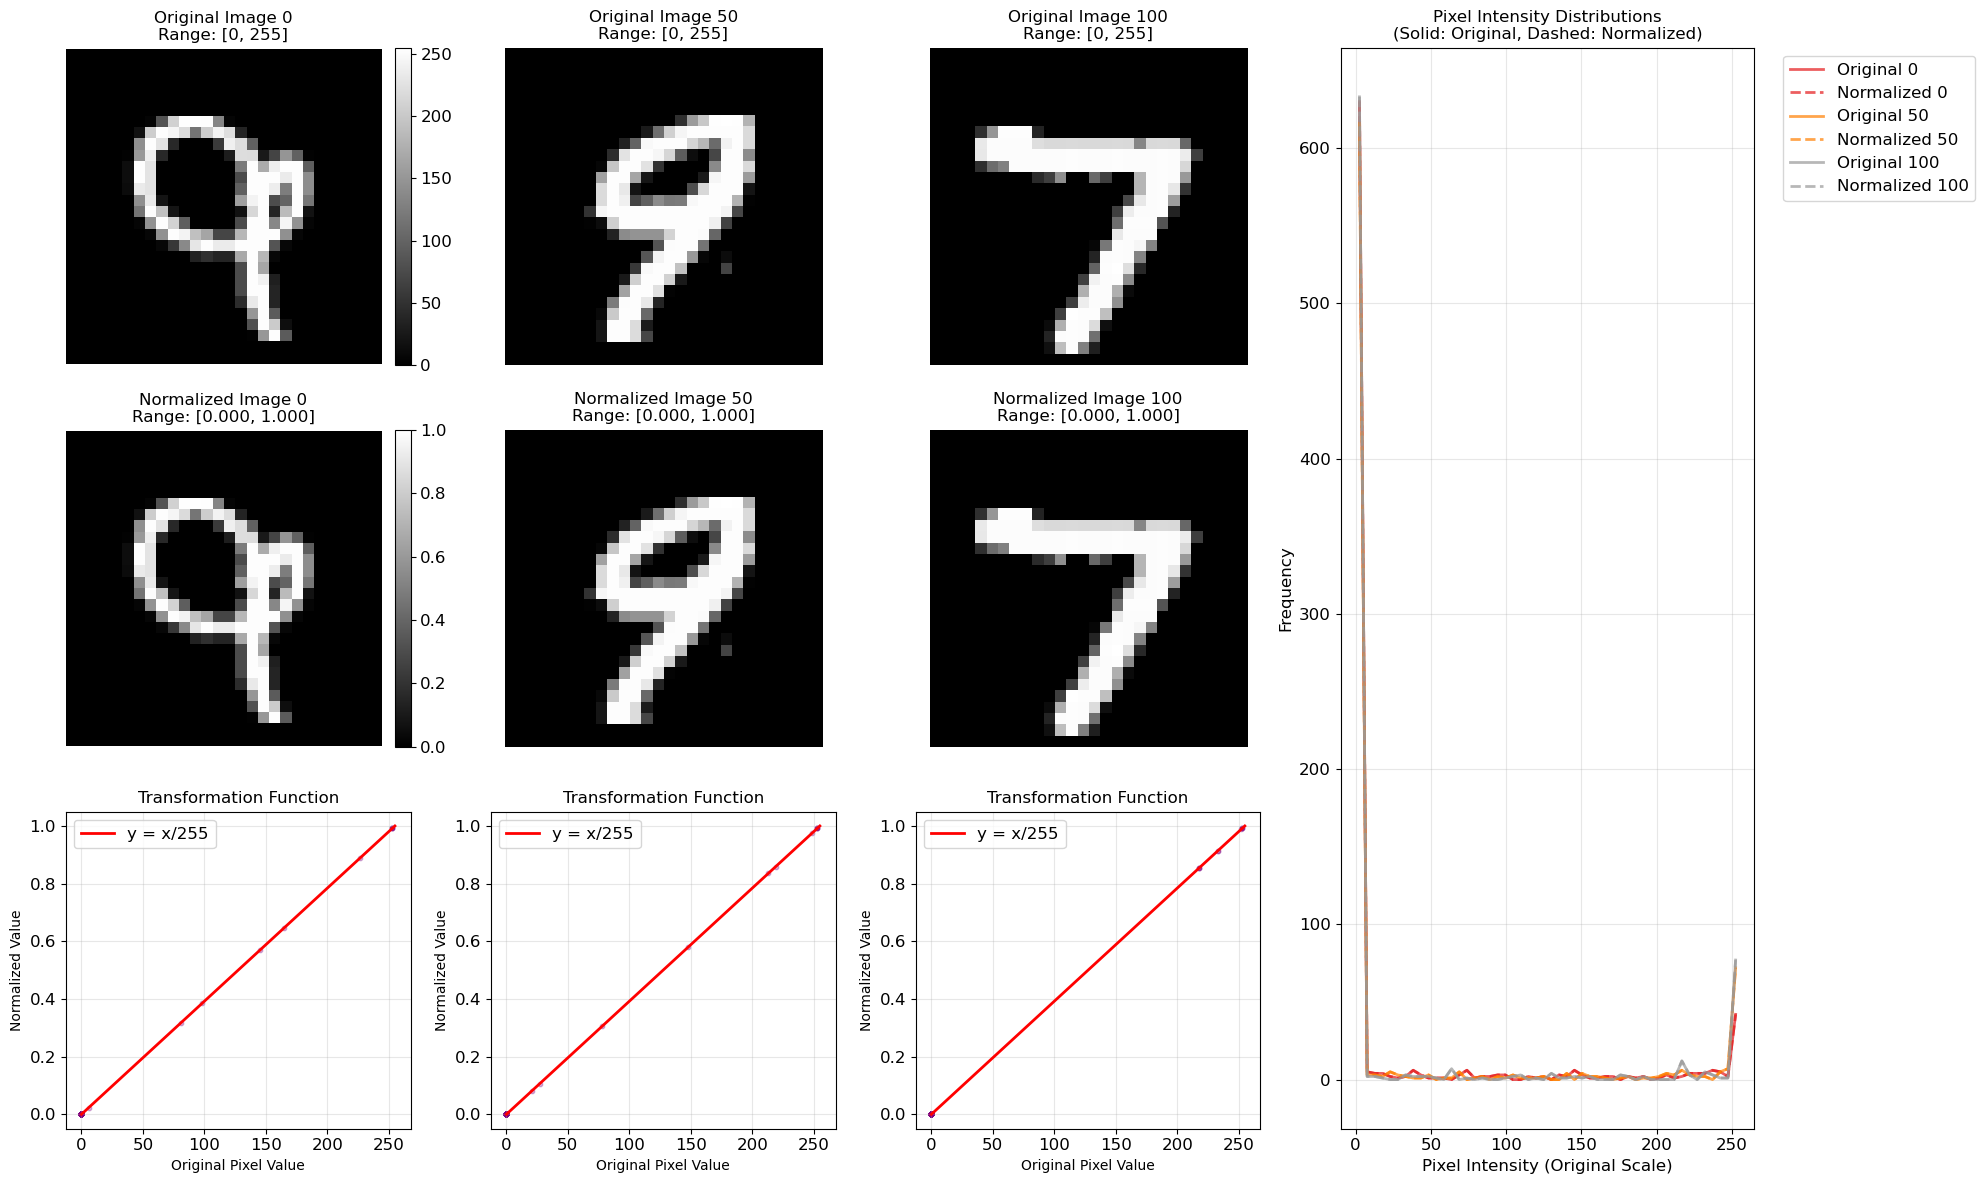


STATISTICAL ANALYSIS:
----------------------------------------
Image    Statistic  Original     Normalized   Scaling Factor 
----------------------------------------------------------------------
0        Mean       31.84        0.1249       1/255.0        
0        Std Dev    75.23        0.2950       1/255.0        
0        Minimum    0.00         0.0000       N/A            
0        Maximum    255.00       1.0000       1/255.0        
----------------------------------------------------------------------
50       Mean       39.92        0.1566       1/255.0        
50       Std Dev    85.87        0.3367       1/255.0        
50       Minimum    0.00         0.0000       N/A            
50       Maximum    255.00       1.0000       1/255.0        
----------------------------------------------------------------------
100      Mean       37.86        0.1485       1/255.0        
100      Std Dev    84.79        0.3325       1/255.0        
100      Minimum    0.00         0.0000  

In [12]:
def demonstrate_image_normalization(images, sample_indices=None):
    """
    Demonstrate image pixel normalization techniques with analysis.
    
    Parameters:
    -----------
    images : numpy.ndarray of shape (n_samples, height, width)
        Array of images with pixel values in [0, 255]
    sample_indices : list or None, default=None
        Indices of specific images to analyze. If None, uses first 3 images.
    
    Returns:
    --------
    dict : Results containing:
        - 'original_images': Original images
        - 'normalized_images': Normalized images [0, 1]
        - 'statistics': Statistical analysis of normalization
        - 'histogram_data': Pixel intensity distributions
    
    Mathematical operations:
    -----------------------
    1. Simple normalization: I_norm = I_orig / 255
    2. Maps [0, 255] → [0, 1] linearly
    3. Preserves relative intensities and spatial structure
    
    Benefits:
    --------
    - Numerical stability in algorithms
    - Better gradient flow in neural networks  
    - Standardized input range for models
    """
    print("="*70)
    print("IMAGE PIXEL NORMALIZATION DEMONSTRATION")
    print("="*70)
    
    if sample_indices is None:
        sample_indices = [0, 1, 2] if len(images) >= 3 else list(range(len(images)))
    
    n_samples = len(sample_indices)
    
    # Perform normalization
    normalized_images = []
    statistics = {
        'original': {'means': [], 'stds': [], 'mins': [], 'maxs': []},
        'normalized': {'means': [], 'stds': [], 'mins': [], 'maxs': []},
        'histogram_data': {'original': [], 'normalized': []}
    }
    
    print(f"Analyzing {n_samples} sample images...")
    print(f"Original pixel range: [0, 255] (8-bit integers)")
    print(f"Target range: [0, 1] (floating-point)")
    
    for idx in sample_indices:
        # Extract and normalize image
        original_img = images[idx]
        normalized_img = original_img / 255.0
        normalized_images.append(normalized_img)
        
        # Calculate statistics
        orig_flat = original_img.flatten()
        norm_flat = normalized_img.flatten()
        
        # Original image statistics
        statistics['original']['means'].append(np.mean(orig_flat))
        statistics['original']['stds'].append(np.std(orig_flat))
        statistics['original']['mins'].append(np.min(orig_flat))
        statistics['original']['maxs'].append(np.max(orig_flat))
        
        # Normalized image statistics  
        statistics['normalized']['means'].append(np.mean(norm_flat))
        statistics['normalized']['stds'].append(np.std(norm_flat))
        statistics['normalized']['mins'].append(np.min(norm_flat))
        statistics['normalized']['maxs'].append(np.max(norm_flat))
        
        # Histogram data
        orig_hist, orig_bins = np.histogram(orig_flat, bins=50, range=(0, 255))
        norm_hist, norm_bins = np.histogram(norm_flat, bins=50, range=(0, 1))
        statistics['histogram_data']['original'].append((orig_hist, orig_bins))
        statistics['histogram_data']['normalized'].append((norm_hist, norm_bins))
    
    # Create comprehensive visualization
    fig = plt.figure(figsize=(20, 12))
    
    # Create grid layout
    gs = fig.add_gridspec(3, n_samples + 1, height_ratios=[1, 1, 1], 
                         width_ratios=[1] * n_samples + [1.2])
    
    for i, idx in enumerate(sample_indices):
        original_img = images[idx]
        normalized_img = normalized_images[i]
        
        # Original images (top row)
        ax1 = fig.add_subplot(gs[0, i])
        im1 = ax1.imshow(original_img, cmap='gray', vmin=0, vmax=255)
        ax1.set_title(f'Original Image {idx}\nRange: [{original_img.min():.0f}, {original_img.max():.0f}]', 
                     fontsize=12)
        ax1.axis('off')
        if i == 0:  # Add colorbar only to first image
            plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
        
        # Normalized images (middle row)
        ax2 = fig.add_subplot(gs[1, i])
        im2 = ax2.imshow(normalized_img, cmap='gray', vmin=0, vmax=1)
        ax2.set_title(f'Normalized Image {idx}\nRange: [{normalized_img.min():.3f}, {normalized_img.max():.3f}]', 
                     fontsize=12)
        ax2.axis('off')
        if i == 0:  # Add colorbar only to first image
            plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
        
        # Difference visualization (bottom row)
        ax3 = fig.add_subplot(gs[2, i])
        # Show transformation effect as scatter plot
        orig_sample = original_img[::4, ::4].flatten()  # Subsample for clarity
        norm_sample = normalized_img[::4, ::4].flatten()
        ax3.scatter(orig_sample, norm_sample, alpha=0.3, s=10, color='purple')
        ax3.plot([0, 255], [0, 1], 'r-', linewidth=2, label='y = x/255')
        ax3.set_xlabel('Original Pixel Value', fontsize=10)
        ax3.set_ylabel('Normalized Value', fontsize=10)
        ax3.set_title(f'Transformation Function', fontsize=12)
        ax3.grid(True, alpha=0.3)
        ax3.legend()
    
    # Combined histogram analysis (rightmost column)
    ax_hist = fig.add_subplot(gs[:, -1])
    colors = plt.cm.Set1(np.linspace(0, 1, n_samples))
    
    for i, idx in enumerate(sample_indices):
        orig_hist, orig_bins = statistics['histogram_data']['original'][i]
        norm_hist, norm_bins = statistics['histogram_data']['normalized'][i]
        
        # Plot original histograms (top half)
        orig_centers = (orig_bins[:-1] + orig_bins[1:]) / 2
        ax_hist.plot(orig_centers, orig_hist, color=colors[i], alpha=0.7, linewidth=2,
                    label=f'Original {idx}', linestyle='-')
        
        # Plot normalized histograms (scaled to same range for comparison)
        norm_centers = (norm_bins[:-1] + norm_bins[1:]) / 2
        norm_centers_scaled = norm_centers * 255  # Scale back to 0-255 for comparison
        ax_hist.plot(norm_centers_scaled, norm_hist, color=colors[i], alpha=0.7, linewidth=2,
                    label=f'Normalized {idx}', linestyle='--')
    
    ax_hist.set_xlabel('Pixel Intensity (Original Scale)', fontsize=12)
    ax_hist.set_ylabel('Frequency', fontsize=12)
    ax_hist.set_title('Pixel Intensity Distributions\n(Solid: Original, Dashed: Normalized)', fontsize=12)
    ax_hist.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax_hist.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistical analysis
    print(f"\nSTATISTICAL ANALYSIS:")
    print("-" * 40)
    print(f"{'Image':<8} {'Statistic':<10} {'Original':<12} {'Normalized':<12} {'Scaling Factor':<15}")
    print("-" * 70)
    
    for i, idx in enumerate(sample_indices):
        stats_to_show = ['means', 'stds', 'mins', 'maxs']
        stat_names = ['Mean', 'Std Dev', 'Minimum', 'Maximum']
        
        for stat_key, stat_name in zip(stats_to_show, stat_names):
            orig_val = statistics['original'][stat_key][i]
            norm_val = statistics['normalized'][stat_key][i]
            
            # Calculate scaling factor (should be 1/255 for all except possibly min/max)
            if orig_val != 0:
                scale_factor = norm_val / orig_val
                scale_str = f"1/{1/scale_factor:.1f}" if scale_factor < 1 else f"{scale_factor:.3f}"
            else:
                scale_str = "N/A"
            
            print(f"{idx:<8} {stat_name:<10} {orig_val:<12.2f} {norm_val:<12.4f} {scale_str:<15}")
        print("-" * 70)
    
    print(f"\nNORMALIZATION VERIFICATION:")
    print("-" * 30)
    
    # Check if normalization was applied correctly
    all_correct = True
    for i, idx in enumerate(sample_indices):
        expected_min = statistics['original']['mins'][i] / 255.0
        expected_max = statistics['original']['maxs'][i] / 255.0
        actual_min = statistics['normalized']['mins'][i]
        actual_max = statistics['normalized']['maxs'][i]
        
        min_correct = abs(expected_min - actual_min) < 1e-6
        max_correct = abs(expected_max - actual_max) < 1e-6
        
        print(f"Image {idx}: Min {expected_min:.4f} ≈ {actual_min:.4f} ✓" if min_correct else f"Image {idx}: Min ERROR")
        print(f"         Max {expected_max:.4f} ≈ {actual_max:.4f} ✓" if max_correct else f"         Max ERROR")
        
        all_correct = all_correct and min_correct and max_correct
    
    print(f"\n{'✅ All normalizations performed correctly!' if all_correct else '❌ Normalization errors detected!'}")
    
    print(f"\nKEY INSIGHTS:")
    print("-" * 15)
    print(f"• Linear transformation: I_new = I_old / 255")
    print(f"• Shape preservation: Histograms maintain same shape")
    print(f"• Relative intensities unchanged: Bright pixels remain relatively bright")
    print(f"• Dynamic range reduction: [0,255] → [0,1] (factor of 255)")
    print(f"• No information loss: Transformation is perfectly reversible")
    
    return {
        'original_images': [images[idx] for idx in sample_indices],
        'normalized_images': normalized_images,
        'statistics': statistics,
        'sample_indices': sample_indices
    }

# Demonstrate image pixel normalization
image_norm_results = demonstrate_image_normalization(images, sample_indices=[0, 50, 100])

---

## **6. Advanced Exercises** - Production-Ready Preprocessing with Scikit-Learn

### 6.1 Why Use Scikit-Learn Preprocessors?

While manual implementations help understand the mathematics, **production machine learning** requires robust, consistent preprocessing. Scikit-learn provides **transformer objects** that offer:

**1. Consistency and Reproducibility**:
- **Fit-transform paradigm**: Learn parameters from training data, apply to any dataset
- **Parameter storage**: Automatically saves means, standard deviations, min/max values
- **Consistent API**: All transformers follow the same interface

**2. Data Leakage Prevention**:
```python
# WRONG: Using test data statistics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.fit_transform(X_test)    # ❌ Refitting on test data!

# CORRECT: Using only training data statistics  
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # ✅ Apply same transformation
```

**3. Pipeline Integration**:
```python
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])
```

**4. Inverse Transformations**:
```python
X_original = scaler.inverse_transform(X_scaled)  # Convert back to original scale
```

### 6.2 Mathematical Guarantees of Scikit-Learn Transformers

**StandardScaler**: Guarantees exact statistical properties:
- $\mathbb{E}[X_{scaled}] = 0$ (exactly zero mean)
- $\text{Var}[X_{scaled}] = 1$ (exactly unit variance)
- Handles **numerical precision** issues automatically

**MinMaxScaler**: Guarantees exact range:
- $\min(X_{scaled}) = 0$, $\max(X_{scaled}) = 1$
- **Configurable range**: Can specify different ranges like $[-1, 1]$
- **Clipping options**: Handle out-of-range values in new data

**Robust preprocessing**: Some transformers are designed for **outlier resistance**:
- **RobustScaler**: Uses median and interquartile range instead of mean/std
- **QuantileTransformer**: Maps to uniform or normal distributions
- **PowerTransformer**: Box-Cox and Yeo-Johnson transformations for normality

SCIKIT-LEARN STANDARDSCALER DEMONSTRATION
Dataset shape: (150, 4)
Features processed: 4
Samples seen during fitting: 150


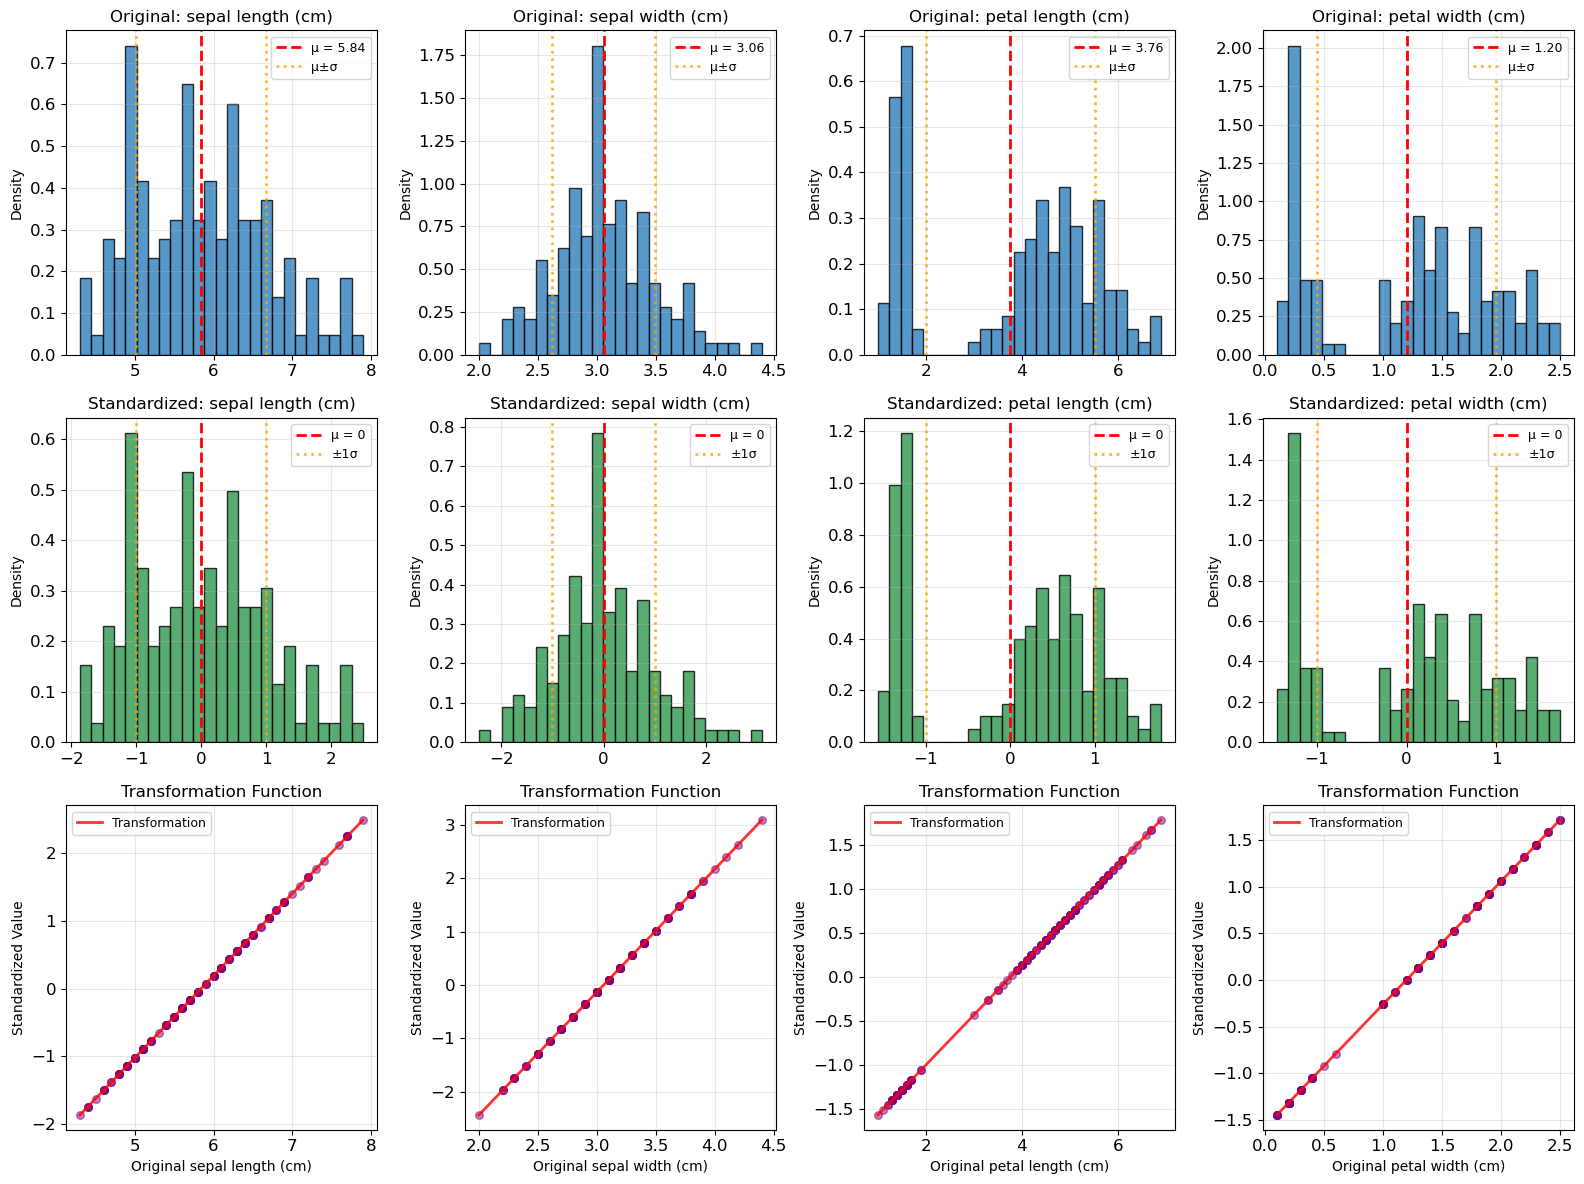


LEARNED PARAMETERS (stored in scaler object):
------------------------------------------------------------
Feature              Mean (μ)     Scale (σ)    Variance    
------------------------------------------------------------
sepal length (cm)    5.8433       0.8253       0.6811      
sepal width (cm)     3.0573       0.4344       0.1887      
petal length (cm)    3.7580       1.7594       3.0955      
petal width (cm)     1.1993       0.7597       0.5771      

VERIFICATION: TRANSFORMATION CORRECTNESS
--------------------------------------------------
Feature              Original μ   Scaled μ     Original σ   Scaled σ    
--------------------------------------------------------------------------------
sepal length (cm)    5.8433       -1.69e-15    0.8281       1.003350    
sepal width (cm)     3.0573       -1.84e-15    0.4359       1.003350    
petal length (cm)    3.7580       -1.70e-15    1.7653       1.003350    
petal width (cm)     1.1993       -1.41e-15    0.7622       1.003

In [13]:
def demonstrate_sklearn_standard_scaler(X, feature_names):
    """
    Demonstrate scikit-learn's StandardScaler with comprehensive analysis.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix to standardize
    feature_names : list of str
        Names of the features
    
    Returns:
    --------
    dict : Results containing:
        - 'scaler': Fitted StandardScaler object
        - 'X_scaled': Standardized feature matrix
        - 'learned_parameters': Scaler's learned parameters
        - 'verification': Statistical verification results
    
    Mathematical guarantee:
    ----------------------
    StandardScaler ensures: E[X_scaled] = 0, Var[X_scaled] = 1
    Transformation: X_scaled = (X - μ) / σ
    where μ = scaler.mean_, σ = scaler.scale_
    
    Production advantages:
    --------------------
    - Consistent preprocessing across train/test splits
    - Prevents data leakage
    - Invertible transformations
    - Pipeline integration
    """
    print("="*80)
    print("SCIKIT-LEARN STANDARDSCALER DEMONSTRATION")
    print("="*80)
    
    from sklearn.preprocessing import StandardScaler
    
    # Create and fit the scaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Extract learned parameters
    learned_params = {
        'means': scaler.mean_,
        'scales': scaler.scale_,  # This is std deviation
        'variances': scaler.var_,
        'n_samples_seen': scaler.n_samples_seen_
    }
    
    print(f"Dataset shape: {X.shape}")
    print(f"Features processed: {len(feature_names)}")
    print(f"Samples seen during fitting: {learned_params['n_samples_seen']}")
    
    # Compute verification statistics
    original_stats = {
        'means': np.mean(X, axis=0),
        'stds': np.std(X, axis=0, ddof=1),  # Sample std
        'mins': np.min(X, axis=0),
        'maxs': np.max(X, axis=0)
    }
    
    scaled_stats = {
        'means': np.mean(X_scaled, axis=0),
        'stds': np.std(X_scaled, axis=0, ddof=1),
        'mins': np.min(X_scaled, axis=0),
        'maxs': np.max(X_scaled, axis=0)
    }
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(3, len(feature_names), figsize=(4*len(feature_names), 12))
    if len(feature_names) == 1:
        axes = axes.reshape(-1, 1)
    
    colors_orig = plt.cm.Blues(0.7)
    colors_scaled = plt.cm.Greens(0.7)
    
    for i in range(len(feature_names)):
        # Original distributions (top row)
        axes[0, i].hist(X[:, i], bins=25, color=colors_orig, alpha=0.8, 
                       edgecolor='black', density=True)
        axes[0, i].axvline(original_stats['means'][i], color='red', linestyle='--', 
                          linewidth=2, label=f'μ = {original_stats["means"][i]:.2f}')
        axes[0, i].axvline(original_stats['means'][i] - original_stats['stds'][i], 
                          color='orange', linestyle=':', linewidth=2, alpha=0.8, label='μ±σ')
        axes[0, i].axvline(original_stats['means'][i] + original_stats['stds'][i], 
                          color='orange', linestyle=':', linewidth=2, alpha=0.8)
        axes[0, i].set_title(f'Original: {feature_names[i]}', fontsize=12)
        axes[0, i].set_ylabel('Density', fontsize=10)
        axes[0, i].legend(fontsize=9)
        axes[0, i].grid(axis='y', alpha=0.3)
        
        # Standardized distributions (middle row)
        axes[1, i].hist(X_scaled[:, i], bins=25, color=colors_scaled, alpha=0.8, 
                       edgecolor='black', density=True)
        axes[1, i].axvline(0, color='red', linestyle='--', linewidth=2, label='μ = 0')
        axes[1, i].axvline(-1, color='orange', linestyle=':', linewidth=2, alpha=0.8, label='±1σ')
        axes[1, i].axvline(1, color='orange', linestyle=':', linewidth=2, alpha=0.8)
        axes[1, i].set_title(f'Standardized: {feature_names[i]}', fontsize=12)
        axes[1, i].set_ylabel('Density', fontsize=10)
        axes[1, i].legend(fontsize=9)
        axes[1, i].grid(axis='y', alpha=0.3)
        
        # Transformation visualization (bottom row)
        axes[2, i].scatter(X[:, i], X_scaled[:, i], alpha=0.5, s=30, color='purple')
        
        # Plot transformation line
        x_range = np.linspace(X[:, i].min(), X[:, i].max(), 100)
        y_range = (x_range - learned_params['means'][i]) / learned_params['scales'][i]
        axes[2, i].plot(x_range, y_range, 'r-', linewidth=2, alpha=0.8, 
                       label='Transformation')
        
        axes[2, i].set_xlabel(f'Original {feature_names[i]}', fontsize=10)
        axes[2, i].set_ylabel('Standardized Value', fontsize=10)
        axes[2, i].set_title(f'Transformation Function', fontsize=12)
        axes[2, i].grid(True, alpha=0.3)
        axes[2, i].legend(fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print(f"\nLEARNED PARAMETERS (stored in scaler object):")
    print("-" * 60)
    print(f"{'Feature':<20} {'Mean (μ)':<12} {'Scale (σ)':<12} {'Variance':<12}")
    print("-" * 60)
    
    for i, name in enumerate(feature_names):
        mean_val = learned_params['means'][i]
        scale_val = learned_params['scales'][i]
        var_val = learned_params['variances'][i]
        print(f"{name:<20} {mean_val:<12.4f} {scale_val:<12.4f} {var_val:<12.4f}")
    
    print(f"\nVERIFICATION: TRANSFORMATION CORRECTNESS")
    print("-" * 50)
    print(f"{'Feature':<20} {'Original μ':<12} {'Scaled μ':<12} {'Original σ':<12} {'Scaled σ':<12}")
    print("-" * 80)
    
    verification_results = {}
    all_correct = True
    
    for i, name in enumerate(feature_names):
        orig_mean = original_stats['means'][i]
        orig_std = original_stats['stds'][i]
        scaled_mean = scaled_stats['means'][i]
        scaled_std = scaled_stats['stds'][i]
        
        # Check if standardization worked correctly
        mean_correct = abs(scaled_mean) < 1e-10  # Should be essentially 0
        std_correct = abs(scaled_std - 1.0) < 1e-10  # Should be essentially 1
        
        verification_results[name] = {
            'mean_correct': mean_correct,
            'std_correct': std_correct,
            'scaled_mean': scaled_mean,
            'scaled_std': scaled_std
        }
        
        all_correct = all_correct and mean_correct and std_correct
        
        print(f"{name:<20} {orig_mean:<12.4f} {scaled_mean:<12.2e} {orig_std:<12.4f} {scaled_std:<12.6f}")
    
    print(f"\n{'✅ All standardizations performed correctly!' if all_correct else '❌ Standardization errors detected!'}")
    
    # Demonstrate key sklearn features
    print(f"\nSCIKIT-LEARN SCALER FEATURES:")
    print("-" * 35)
    
    # 1. Inverse transformation
    X_reconstructed = scaler.inverse_transform(X_scaled)
    reconstruction_error = np.mean(np.abs(X - X_reconstructed))
    print(f"• Inverse transformation error: {reconstruction_error:.2e} (should be ~0)")
    
    # 2. Transform new data (simulated)
    new_sample = np.array([[5.0, 3.0, 2.0, 0.5]])  # One new sample
    new_scaled = scaler.transform(new_sample)
    print(f"• New sample transformation: {new_sample.flatten()} → {new_scaled.flatten()}")
    
    # 3. Handling of constant features (if any)
    feature_ranges = np.ptp(X, axis=0)  # Peak-to-peak (range)
    constant_features = feature_ranges < 1e-8
    if np.any(constant_features):
        print(f"• Constant features detected: {np.where(constant_features)[0]}")
    else:
        print(f"• No constant features detected (all features vary)")
    
    print(f"\nKEY ADVANTAGES OF SKLEARN STANDARDSCALER:")
    print("-" * 45)
    print(f"• Data leakage prevention: Parameters learned only from training data")
    print(f"• Numerical stability: Handles edge cases automatically") 
    print(f"• Pipeline integration: Compatible with sklearn pipelines")
    print(f"• Invertible: Can reconstruct original values perfectly")
    print(f"• Consistent API: Same interface as all sklearn transformers")
    print(f"• Memory efficient: Stores only essential parameters ({learned_params['means'].nbytes + learned_params['scales'].nbytes} bytes)")
    
    return {
        'scaler': scaler,
        'X_scaled': X_scaled,
        'learned_parameters': learned_params,
        'original_statistics': original_stats,
        'scaled_statistics': scaled_stats,
        'verification': verification_results,
        'reconstruction_error': reconstruction_error
    }

# Demonstrate scikit-learn StandardScaler
sklearn_scaler_results = demonstrate_sklearn_standard_scaler(X, feature_names)

### 6.3 MinMaxScaler: Bounded Feature Scaling

**Mathematical Implementation in Scikit-Learn**:
$$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} \cdot (max - min) + min$$

where $(min, max)$ is the target range (default: $(0, 1)$).

**Stored Parameters**:
- `scaler.data_min_`: Minimum value per feature from training data
- `scaler.data_max_`: Maximum value per feature from training data  
- `scaler.data_range_`: $X_{max} - X_{min}$ per feature
- `scaler.scale_`: Scaling factor per feature = $\frac{max - min}{X_{max} - X_{min}}$

**Handling Edge Cases**:
- **Constant features**: If $X_{max} = X_{min}$, scikit-learn sets scale = 1 and min = 0
- **New data outside range**: Values outside training range will exceed $[0, 1]$
- **Clipping option**: `clip=True` forces values to stay in bounds

SCIKIT-LEARN MINMAXSCALER DEMONSTRATION
Dataset shape: (150, 4)
Target range: (0, 1)
Samples seen during fitting: 150


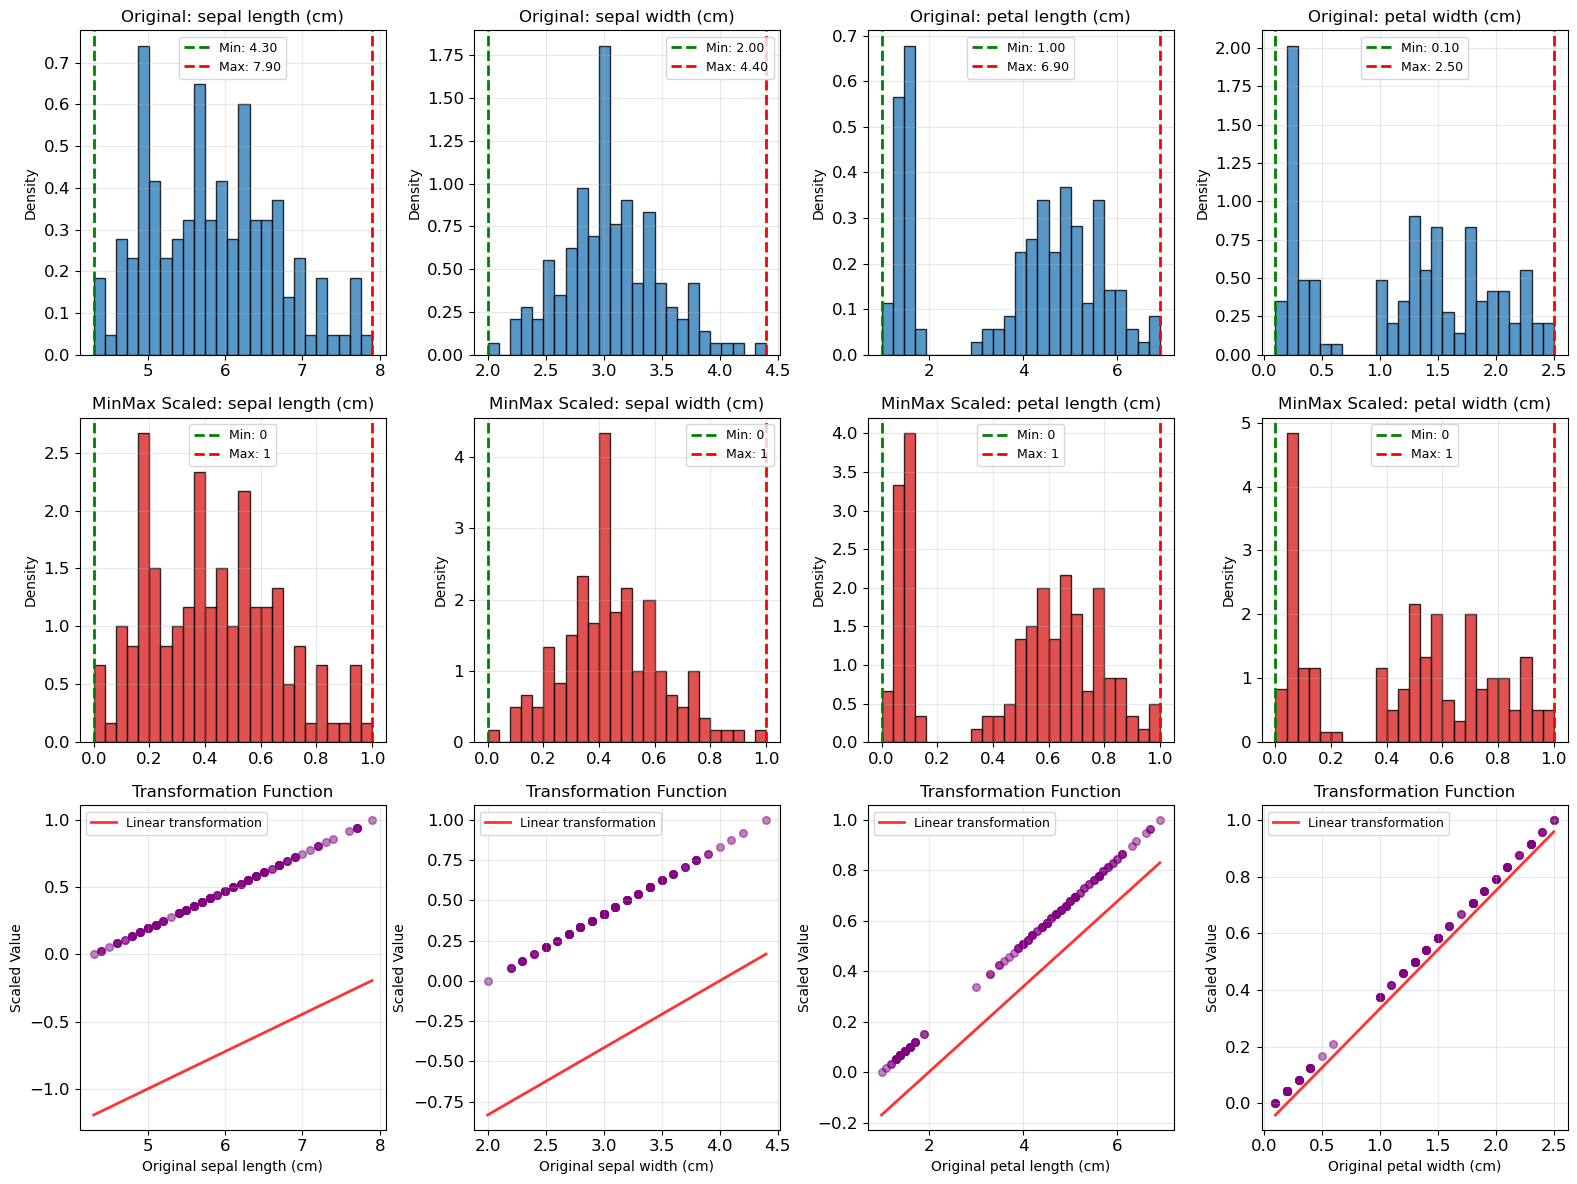


LEARNED PARAMETERS (stored in scaler object):
----------------------------------------------------------------------
Feature              Data Min     Data Max     Range        Scale Factor   
----------------------------------------------------------------------
sepal length (cm)    4.3000       7.9000       3.6000       0.277778       
sepal width (cm)     2.0000       4.4000       2.4000       0.416667       
petal length (cm)    1.0000       6.9000       5.9000       0.169492       
petal width (cm)     0.1000       2.5000       2.4000       0.416667       

RANGE VERIFICATION:
-------------------------
Feature              Target Range    Actual Range    Status    
-----------------------------------------------------------------
sepal length (cm)    [0, 1]        [0.000000, 1.000000]   ✓ OK      
sepal width (cm)     [0, 1]        [0.000000, 1.000000]   ✓ OK      
petal length (cm)    [0, 1]        [0.000000, 1.000000]   ✓ OK      
petal width (cm)     [0, 1]        [0.000000, 1

In [14]:
def demonstrate_sklearn_minmax_scaler(X, feature_names, feature_range=(0, 1)):
    """
    Demonstrate scikit-learn's MinMaxScaler with comprehensive analysis.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix to normalize
    feature_names : list of str
        Names of the features
    feature_range : tuple, default=(0, 1)
        Target range for normalized features
    
    Returns:
    --------
    dict : Results containing:
        - 'scaler': Fitted MinMaxScaler object
        - 'X_scaled': Min-max normalized feature matrix
        - 'learned_parameters': Scaler's learned parameters
        - 'range_verification': Range verification results
    
    Mathematical transformation:
    ---------------------------
    X_scaled = (X - X_min) / (X_max - X_min) * (max - min) + min
    where (min, max) is the target feature_range
    
    Production advantages:
    --------------------
    - Guaranteed output range bounds
    - Handles constant features gracefully
    - Configurable target range
    - Invertible transformation
    """
    print("="*80)
    print("SCIKIT-LEARN MINMAXSCALER DEMONSTRATION")
    print("="*80)
    
    from sklearn.preprocessing import MinMaxScaler
    
    # Create and fit the scaler
    scaler = MinMaxScaler(feature_range=feature_range)
    X_scaled = scaler.fit_transform(X)
    
    # Extract learned parameters
    learned_params = {
        'data_min': scaler.data_min_,
        'data_max': scaler.data_max_,
        'data_range': scaler.data_range_,
        'scale': scaler.scale_,
        'min': scaler.min_,
        'feature_range': scaler.feature_range,
        'n_samples_seen': scaler.n_samples_seen_
    }
    
    print(f"Dataset shape: {X.shape}")
    print(f"Target range: {feature_range}")
    print(f"Samples seen during fitting: {learned_params['n_samples_seen']}")
    
    # Calculate statistics
    original_stats = {
        'mins': np.min(X, axis=0),
        'maxs': np.max(X, axis=0),
        'ranges': np.ptp(X, axis=0),  # Peak-to-peak (range)
        'means': np.mean(X, axis=0),
        'stds': np.std(X, axis=0)
    }
    
    scaled_stats = {
        'mins': np.min(X_scaled, axis=0),
        'maxs': np.max(X_scaled, axis=0),
        'ranges': np.ptp(X_scaled, axis=0),
        'means': np.mean(X_scaled, axis=0),
        'stds': np.std(X_scaled, axis=0)
    }
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(3, len(feature_names), figsize=(4*len(feature_names), 12))
    if len(feature_names) == 1:
        axes = axes.reshape(-1, 1)
    
    colors_orig = plt.cm.Blues(0.7)
    colors_scaled = plt.cm.Reds(0.7)
    
    for i in range(len(feature_names)):
        # Original distributions (top row)
        axes[0, i].hist(X[:, i], bins=25, color=colors_orig, alpha=0.8, 
                       edgecolor='black', density=True)
        axes[0, i].axvline(original_stats['mins'][i], color='green', linestyle='--', 
                          linewidth=2, label=f'Min: {original_stats["mins"][i]:.2f}')
        axes[0, i].axvline(original_stats['maxs'][i], color='red', linestyle='--', 
                          linewidth=2, label=f'Max: {original_stats["maxs"][i]:.2f}')
        axes[0, i].set_title(f'Original: {feature_names[i]}', fontsize=12)
        axes[0, i].set_ylabel('Density', fontsize=10)
        axes[0, i].legend(fontsize=9)
        axes[0, i].grid(axis='y', alpha=0.3)
        
        # Normalized distributions (middle row)
        axes[1, i].hist(X_scaled[:, i], bins=25, color=colors_scaled, alpha=0.8, 
                       edgecolor='black', density=True)
        axes[1, i].axvline(feature_range[0], color='green', linestyle='--', 
                          linewidth=2, label=f'Min: {feature_range[0]}')
        axes[1, i].axvline(feature_range[1], color='red', linestyle='--', 
                          linewidth=2, label=f'Max: {feature_range[1]}')
        axes[1, i].set_title(f'MinMax Scaled: {feature_names[i]}', fontsize=12)
        axes[1, i].set_ylabel('Density', fontsize=10)
        axes[1, i].legend(fontsize=9)
        axes[1, i].grid(axis='y', alpha=0.3)
        
        # Transformation visualization (bottom row)
        axes[2, i].scatter(X[:, i], X_scaled[:, i], alpha=0.5, s=30, color='purple')
        
        # Plot transformation line
        x_range = np.linspace(X[:, i].min(), X[:, i].max(), 100)
        y_range = (x_range - learned_params['data_min'][i]) * learned_params['scale'][i] + learned_params['min'][i]
        axes[2, i].plot(x_range, y_range, 'r-', linewidth=2, alpha=0.8, 
                       label='Linear transformation')
        
        axes[2, i].set_xlabel(f'Original {feature_names[i]}', fontsize=10)
        axes[2, i].set_ylabel('Scaled Value', fontsize=10)
        axes[2, i].set_title(f'Transformation Function', fontsize=12)
        axes[2, i].grid(True, alpha=0.3)
        axes[2, i].legend(fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print(f"\nLEARNED PARAMETERS (stored in scaler object):")
    print("-" * 70)
    print(f"{'Feature':<20} {'Data Min':<12} {'Data Max':<12} {'Range':<12} {'Scale Factor':<15}")
    print("-" * 70)
    
    for i, name in enumerate(feature_names):
        data_min = learned_params['data_min'][i]
        data_max = learned_params['data_max'][i]
        data_range = learned_params['data_range'][i]
        scale_factor = learned_params['scale'][i]
        print(f"{name:<20} {data_min:<12.4f} {data_max:<12.4f} {data_range:<12.4f} {scale_factor:<15.6f}")
    
    print(f"\nRANGE VERIFICATION:")
    print("-" * 25)
    print(f"{'Feature':<20} {'Target Range':<15} {'Actual Range':<15} {'Status':<10}")
    print("-" * 65)
    
    range_verification = {}
    all_ranges_correct = True
    
    for i, name in enumerate(feature_names):
        target_min, target_max = feature_range
        actual_min = scaled_stats['mins'][i]
        actual_max = scaled_stats['maxs'][i]
        
        min_correct = abs(actual_min - target_min) < 1e-10
        max_correct = abs(actual_max - target_max) < 1e-10
        range_correct = min_correct and max_correct
        
        range_verification[name] = {
            'min_correct': min_correct,
            'max_correct': max_correct,
            'actual_min': actual_min,
            'actual_max': actual_max
        }
        
        all_ranges_correct = all_ranges_correct and range_correct
        status = "✓ OK" if range_correct else "✗ ERROR"
        
        print(f"{name:<20} [{target_min}, {target_max}]        [{actual_min:.6f}, {actual_max:.6f}]   {status:<10}")
    
    print(f"\n{'✅ All ranges correct!' if all_ranges_correct else '❌ Range errors detected!'}")
    
    # Advanced analysis
    print(f"\nTRANSFORMATION ANALYSIS:")
    print("-" * 30)
    
    # Check for constant features
    constant_features = learned_params['data_range'] < 1e-8
    if np.any(constant_features):
        const_names = [feature_names[i] for i in np.where(constant_features)[0]]
        print(f"• Constant features detected: {const_names}")
        print(f"  (These will be set to feature_range minimum)")
    else:
        print(f"• No constant features detected")
    
    # Demonstrate key sklearn features
    print(f"\nSCIKIT-LEARN MINMAXSCALER FEATURES:")
    print("-" * 40)
    
    # 1. Inverse transformation
    X_reconstructed = scaler.inverse_transform(X_scaled)
    reconstruction_error = np.mean(np.abs(X - X_reconstructed))
    print(f"• Inverse transformation error: {reconstruction_error:.2e}")
    
    # 2. Transform new data
    new_sample = np.array([[6.0, 4.0, 3.0, 1.0]])  # Outside original range
    new_scaled = scaler.transform(new_sample)
    print(f"• New sample (possibly out-of-range):")
    print(f"  Original: {new_sample.flatten()}")
    print(f"  Scaled:   {new_scaled.flatten()}")
    
    # Check if new sample is outside target range
    outside_range = np.any(new_scaled < feature_range[0]) or np.any(new_scaled > feature_range[1])
    if outside_range:
        print(f"  ⚠️  New sample exceeds target range (this is normal behavior)")
    else:
        print(f"  ✓ New sample within target range")
    
    # 3. Memory usage
    param_memory = sum(param.nbytes for param in [learned_params['data_min'], 
                                                 learned_params['data_max'], 
                                                 learned_params['scale']])
    print(f"• Memory usage: {param_memory} bytes for parameters")
    
    print(f"\nKEY ADVANTAGES:")
    print("-" * 20)
    print(f"• Bounded output: Guaranteed range {feature_range}")
    print(f"• Linear transformation: Preserves relative distances")
    print(f"• Handles outliers: New data can exceed bounds (configurable)")
    print(f"• Feature-wise scaling: Each feature scaled independently")
    print(f"• Configurable range: Can set any target range")
    
    print(f"\nUSE CASES:")
    print("-" * 12)
    print(f"• Neural networks with bounded activation functions")
    print(f"• Algorithms requiring features in specific ranges")
    print(f"• Image processing (normalize to [0,1])")
    print(f"• When preserving zero values is important")
    
    return {
        'scaler': scaler,
        'X_scaled': X_scaled,
        'learned_parameters': learned_params,
        'original_statistics': original_stats,
        'scaled_statistics': scaled_stats,
        'range_verification': range_verification,
        'reconstruction_error': reconstruction_error
    }

# Demonstrate scikit-learn MinMaxScaler
sklearn_minmax_results = demonstrate_sklearn_minmax_scaler(X, feature_names, feature_range=(0, 1))

### 6.4 Normalizer: Unit Vector Scaling

**Mathematical Foundation**:
The **Normalizer** scales each sample **individually** to unit norm:
$$\mathbf{x}_{normalized} = \frac{\mathbf{x}}{||\mathbf{x}||_p}$$

**Common Norms**:
- **L2 norm** (Euclidean): $||\mathbf{x}||_2 = \sqrt{\sum_{i=1}^d x_i^2}$
- **L1 norm** (Manhattan): $||\mathbf{x}||_1 = \sum_{i=1}^d |x_i|$
- **L∞ norm** (Maximum): $||\mathbf{x}||_\infty = \max_i |x_i|$

**Geometric Interpretation**:
After L2 normalization, all samples lie on the **unit hypersphere** in $\mathbb{R}^d$:
$$||\mathbf{x}_{normalized}||_2 = 1 \quad \forall \mathbf{x}$$

**When to use Normalizer**:
- **Text classification**: TF-IDF vectors (focus on term proportions, not document length)
- **Cosine similarity**: When angle between vectors matters more than magnitude
- **Neural networks**: Some architectures benefit from unit-norm inputs
- **Clustering**: When samples have different scales but similar structure

**Mathematical Properties**:
- **Scale invariant**: $\text{Normalize}(c\mathbf{x}) = \text{Normalize}(\mathbf{x})$ for $c > 0$
- **Preserves angles**: Cosine similarity unchanged between original and normalized vectors
- **Unit constraint**: All samples have the same norm after transformation

**Difference from StandardScaler**:
- **StandardScaler**: Operates on **features** (columns) - centers and scales each feature
- **Normalizer**: Operates on **samples** (rows) - scales each sample to unit norm

SCIKIT-LEARN NORMALIZER DEMONSTRATION
Dataset shape: (10, 4)
Normalization method: L2-norm
Samples processed: 10
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

NORM COMPARISON (L2-norm: √(Σx²)):
-----------------------------------------------------------------
Sample   Original Norm   Normalized Norm   Scaling Factor 
-----------------------------------------------------------------
   0         6.3451          1.000000          6.3451     
   1         5.9169          1.000000          5.9169     
   2         5.8361          1.000000          5.8361     
   3         5.7498          1.000000          5.7498     
   4         6.3214          1.000000          6.3214     
   5         6.8862          1.000000          6.8862     
   6         5.8966          1.000000          5.8966     
   7         6.2330          1.000000          6.2330     
   8         5.4562          1.000000          5.4562     
   9         5.9900          1.00000

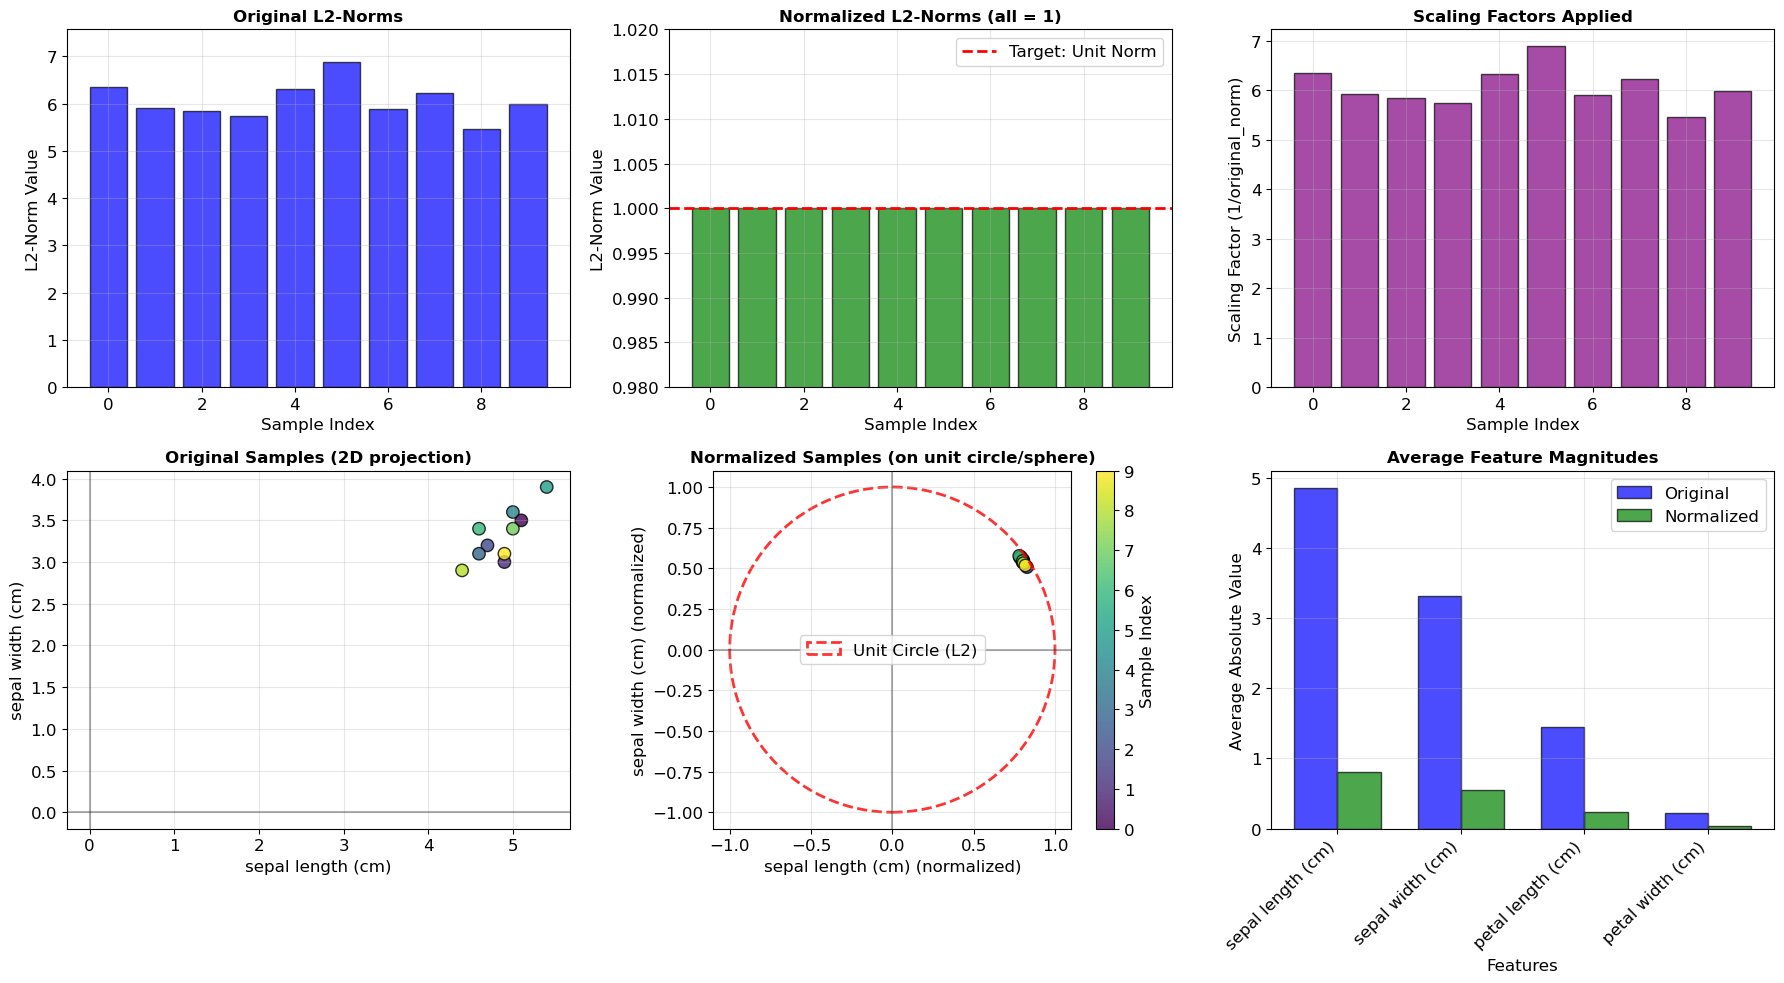


GEOMETRIC ANALYSIS:
-------------------------
• Original space - Average pairwise distance: 0.5569
• Normalized space - Average pairwise distance: 0.0422
• Cosine similarity preservation: True
  (Normalizer preserves angular relationships)

COMPARISON WITH OTHER NORMS (first sample):
---------------------------------------------
Sample 0 values: [5.1 3.5 1.4 0.2]
L1 norm (Σ|x|):     10.2000
L2 norm (√Σx²):     6.3451
L∞ norm (max|x|):   5.1000

NORMALIZER PROPERTIES:
-------------------------
• Scale invariant: Normalize(c·x) = Normalize(x) for c > 0
• Preserves angles: Cosine similarity unchanged
• Sample-wise operation: Each row scaled independently
• Unit constraint: All samples have norm = 1 after transformation

DIFFERENCE FROM STANDARDSCALER:
-----------------------------------
• StandardScaler: Operates on FEATURES (columns)
  - Centers each feature: mean = 0
  - Scales each feature: std = 1
• Normalizer: Operates on SAMPLES (rows)
  - Scales each sample: norm = 1
  - No center

In [15]:
def demonstrate_sklearn_normalizer(X, feature_names, norm='l2', n_samples=10):
    """
    Demonstrate scikit-learn's Normalizer with comprehensive analysis.
    
    Parameters:
    -----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix to normalize
    feature_names : list of str
        Names of the features
    norm : str, default='l2'
        The norm to use: 'l1', 'l2', or 'max'
    n_samples : int, default=10
        Number of samples to demonstrate (for visualization clarity)
    
    Returns:
    --------
    dict : Results containing:
        - 'normalizer': Fitted Normalizer object
        - 'X_normalized': Normalized feature matrix  
        - 'norms_comparison': Original vs normalized norms
        - 'geometric_analysis': Geometric properties analysis
    
    Mathematical transformation:
    ---------------------------
    For each sample x_i: x_normalized = x_i / ||x_i||_p
    where p corresponds to the chosen norm:
    - L2 (Euclidean): ||x||_2 = √(Σx_j²)
    - L1 (Manhattan): ||x||_1 = Σ|x_j|  
    - L∞ (Maximum): ||x||_∞ = max|x_j|
    
    Key insight:
    -----------
    Unlike StandardScaler (operates on features/columns), 
    Normalizer operates on samples (rows) - each sample becomes unit vector
    """
    print("="*80)
    print("SCIKIT-LEARN NORMALIZER DEMONSTRATION")
    print("="*80)
    
    from sklearn.preprocessing import Normalizer
    
    # Use subset for clearer visualization
    X_subset = X[:n_samples]
    
    # Create and fit the normalizer
    normalizer = Normalizer(norm=norm)
    X_normalized = normalizer.fit_transform(X_subset)
    
    print(f"Dataset shape: {X_subset.shape}")
    print(f"Normalization method: {norm.upper()}-norm")
    print(f"Samples processed: {n_samples}")
    print(f"Features: {feature_names}")
    
    # Calculate norms for different metrics
    if norm == 'l2':
        norms_original = np.linalg.norm(X_subset, axis=1, ord=2)
        norms_normalized = np.linalg.norm(X_normalized, axis=1, ord=2)
        norm_formula = "√(Σx²)"
    elif norm == 'l1':
        norms_original = np.linalg.norm(X_subset, axis=1, ord=1)
        norms_normalized = np.linalg.norm(X_normalized, axis=1, ord=1)
        norm_formula = "Σ|x|"
    elif norm == 'max':
        norms_original = np.linalg.norm(X_subset, axis=1, ord=np.inf)
        norms_normalized = np.linalg.norm(X_normalized, axis=1, ord=np.inf)
        norm_formula = "max|x|"
    
    # Comprehensive analysis
    print(f"\nNORM COMPARISON ({norm.upper()}-norm: {norm_formula}):")
    print("-" * 65)
    print(f"{'Sample':<8} {'Original Norm':<15} {'Normalized Norm':<17} {'Scaling Factor':<15}")
    print("-" * 65)
    
    scaling_factors = norms_original / norms_normalized  # Should be original norm for unit normalization
    for i in range(n_samples):
        print(f"{i:^8} {norms_original[i]:^15.4f} {norms_normalized[i]:^17.6f} {scaling_factors[i]:^15.4f}")
    
    # Verify unit norm property
    unit_norm_achieved = np.allclose(norms_normalized, 1.0, atol=1e-10)
    print(f"\n✅ Unit norm achieved: {unit_norm_achieved}")
    print(f"Max deviation from 1.0: {np.max(np.abs(norms_normalized - 1.0)):.2e}")
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # Row 1: Norm comparison
    sample_indices = range(n_samples)
    
    # Original norms
    axes[0, 0].bar(sample_indices, norms_original, color='blue', alpha=0.7, 
                   edgecolor='black', linewidth=1)
    axes[0, 0].set_title(f'Original {norm.upper()}-Norms', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Sample Index')
    axes[0, 0].set_ylabel(f'{norm.upper()}-Norm Value')
    axes[0, 0].set_ylim(0, max(norms_original) * 1.1)
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Normalized norms (should all be 1)
    bars = axes[0, 1].bar(sample_indices, norms_normalized, color='green', alpha=0.7, 
                         edgecolor='black', linewidth=1)
    axes[0, 1].axhline(y=1, color='red', linestyle='--', linewidth=2, label='Target: Unit Norm')
    axes[0, 1].set_title(f'Normalized {norm.upper()}-Norms (all = 1)', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Sample Index')
    axes[0, 1].set_ylabel(f'{norm.upper()}-Norm Value')
    axes[0, 1].set_ylim(0.98, 1.02)
    axes[0, 1].legend()
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Scaling factors
    axes[0, 2].bar(sample_indices, scaling_factors, color='purple', alpha=0.7, 
                   edgecolor='black', linewidth=1)
    axes[0, 2].set_title('Scaling Factors Applied', fontsize=12, fontweight='bold')
    axes[0, 2].set_xlabel('Sample Index')
    axes[0, 2].set_ylabel('Scaling Factor (1/original_norm)')
    axes[0, 2].grid(axis='y', alpha=0.3)
    
    # Row 2: Feature space visualization
    if X_subset.shape[1] >= 2:
        # 2D projection before normalization
        axes[1, 0].scatter(X_subset[:, 0], X_subset[:, 1], c=sample_indices, 
                          cmap='viridis', s=80, alpha=0.8, edgecolors='black')
        axes[1, 0].set_title('Original Samples (2D projection)', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel(f'{feature_names[0]}')
        axes[1, 0].set_ylabel(f'{feature_names[1]}')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Add origin and scale reference
        axes[1, 0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[1, 0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
        
        # 2D projection after normalization
        scatter = axes[1, 1].scatter(X_normalized[:, 0], X_normalized[:, 1], c=sample_indices, 
                                    cmap='viridis', s=80, alpha=0.8, edgecolors='black')
        axes[1, 1].set_title('Normalized Samples (on unit circle/sphere)', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel(f'{feature_names[0]} (normalized)')
        axes[1, 1].set_ylabel(f'{feature_names[1]} (normalized)')
        axes[1, 1].grid(True, alpha=0.3)
        
        # Add unit circle for L2 norm
        if norm == 'l2':
            circle = plt.Circle((0, 0), 1, fill=False, color='red', linestyle='--', 
                               linewidth=2, alpha=0.8, label='Unit Circle (L2)')
            axes[1, 1].add_patch(circle)
            axes[1, 1].legend()
        
        axes[1, 1].set_aspect('equal')
        axes[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[1, 1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
        
        # Colorbar
        plt.colorbar(scatter, ax=axes[1, 1], label='Sample Index')
    
    # Feature magnitude comparison
    feature_magnitudes_orig = np.mean(np.abs(X_subset), axis=0)
    feature_magnitudes_norm = np.mean(np.abs(X_normalized), axis=0)
    
    x_pos = np.arange(len(feature_names))
    width = 0.35
    
    axes[1, 2].bar(x_pos - width/2, feature_magnitudes_orig, width, 
                   label='Original', color='blue', alpha=0.7, edgecolor='black')
    axes[1, 2].bar(x_pos + width/2, feature_magnitudes_norm, width, 
                   label='Normalized', color='green', alpha=0.7, edgecolor='black')
    
    axes[1, 2].set_title('Average Feature Magnitudes', fontsize=12, fontweight='bold')
    axes[1, 2].set_xlabel('Features')
    axes[1, 2].set_ylabel('Average Absolute Value')
    axes[1, 2].set_xticks(x_pos)
    axes[1, 2].set_xticklabels(feature_names, rotation=45, ha='right')
    axes[1, 2].legend()
    axes[1, 2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Geometric analysis
    print(f"\nGEOMETRIC ANALYSIS:")
    print("-" * 25)
    
    # Calculate pairwise distances in original vs normalized space
    from scipy.spatial.distance import pdist, squareform
    
    distances_orig = squareform(pdist(X_subset))
    distances_norm = squareform(pdist(X_normalized))
    
    print(f"• Original space - Average pairwise distance: {np.mean(distances_orig[np.triu_indices_from(distances_orig, k=1)]):.4f}")
    print(f"• Normalized space - Average pairwise distance: {np.mean(distances_norm[np.triu_indices_from(distances_norm, k=1)]):.4f}")
    
    # Cosine similarity analysis
    def cosine_similarity_matrix(X):
        dot_product = np.dot(X, X.T)
        norms = np.linalg.norm(X, axis=1)
        return dot_product / np.outer(norms, norms)
    
    cos_sim_orig = cosine_similarity_matrix(X_subset)
    cos_sim_norm = cosine_similarity_matrix(X_normalized)
    
    print(f"• Cosine similarity preservation: {np.allclose(cos_sim_orig, cos_sim_norm, atol=1e-10)}")
    print(f"  (Normalizer preserves angular relationships)")
    
    # Different norms comparison for same data
    if norm == 'l2':
        print(f"\nCOMPARISON WITH OTHER NORMS (first sample):")
        print("-" * 45)
        sample_0 = X_subset[0]
        l1_norm = np.linalg.norm(sample_0, ord=1)
        l2_norm = np.linalg.norm(sample_0, ord=2)
        linf_norm = np.linalg.norm(sample_0, ord=np.inf)
        
        print(f"Sample 0 values: {sample_0}")
        print(f"L1 norm (Σ|x|):     {l1_norm:.4f}")
        print(f"L2 norm (√Σx²):     {l2_norm:.4f}")
        print(f"L∞ norm (max|x|):   {linf_norm:.4f}")
    
    print(f"\nNORMALIZER PROPERTIES:")
    print("-" * 25)
    print(f"• Scale invariant: Normalize(c·x) = Normalize(x) for c > 0")
    print(f"• Preserves angles: Cosine similarity unchanged")
    print(f"• Sample-wise operation: Each row scaled independently")
    print(f"• Unit constraint: All samples have norm = 1 after transformation")
    
    print(f"\nDIFFERENCE FROM STANDARDSCALER:")
    print("-" * 35)
    print(f"• StandardScaler: Operates on FEATURES (columns)")
    print(f"  - Centers each feature: mean = 0")
    print(f"  - Scales each feature: std = 1")
    print(f"• Normalizer: Operates on SAMPLES (rows)")
    print(f"  - Scales each sample: norm = 1")
    print(f"  - No centering operation")
    
    print(f"\nUSE CASES:")
    print("-" * 12)
    print(f"• Text classification: TF-IDF vectors (focus on term proportions)")
    print(f"• Cosine similarity: When angle matters more than magnitude")
    print(f"• Neural networks: Some architectures benefit from unit-norm inputs")
    print(f"• Clustering: When samples have different scales but similar structure")
    
    # Return comprehensive results
    return {
        'normalizer': normalizer,
        'X_normalized': X_normalized,
        'norms_comparison': {
            'original_norms': norms_original,
            'normalized_norms': norms_normalized,
            'scaling_factors': scaling_factors
        },
        'geometric_analysis': {
            'unit_norm_achieved': unit_norm_achieved,
            'max_deviation': np.max(np.abs(norms_normalized - 1.0)),
            'cosine_similarity_preserved': np.allclose(cos_sim_orig, cos_sim_norm, atol=1e-10),
            'avg_distance_original': np.mean(distances_orig[np.triu_indices_from(distances_orig, k=1)]),
            'avg_distance_normalized': np.mean(distances_norm[np.triu_indices_from(distances_norm, k=1)])
        }
    }

# Demonstrate scikit-learn Normalizer  
sklearn_normalizer_results = demonstrate_sklearn_normalizer(X, feature_names, norm='l2', n_samples=10)

### 6.5 Categorical Data Encoding: Mathematical Representations

**The Problem with Categorical Data**:
Most machine learning algorithms require **numerical input**. Categorical variables like:
- Species: {Setosa, Versicolor, Virginica}
- Color: {Red, Green, Blue}  
- Grade: {A, B, C, D, F}

need to be converted to numbers. **The encoding method matters mathematically!**

### 6.6 Label Encoding: Ordinal Representation

**Mathematical Transformation**:
$$\text{LabelEncoder}: \{c_1, c_2, ..., c_k\} \rightarrow \{0, 1, ..., k-1\}$$

**Example**: Species encoding
- Setosa → 0
- Versicolor → 1  
- Virginica → 2

**When to use Label Encoding**:
- **Ordinal data**: Natural ordering exists (e.g., {Small, Medium, Large})
- **Tree-based models**: Decision trees can handle arbitrary numerical splits
- **Target variables**: For classification, labels are typically encoded as integers

**Mathematical Issues**:
- **Implicit ordering**: Algorithm assumes 0 < 1 < 2, implying Setosa < Versicolor < Virginica
- **Distance metrics**: Euclidean distance between Setosa(0) and Virginica(2) is 2, but between Setosa(0) and Versicolor(1) is 1
- **Not suitable** for nominal data without natural ordering

### 6.7 One-Hot Encoding: Binary Vector Representation

**Mathematical Transformation**:
$$\text{OneHot}: c_i \rightarrow \mathbf{e}_i \in \{0,1\}^k$$

where $\mathbf{e}_i$ is the $i$-th **standard basis vector**:
$$\mathbf{e}_1 = [1, 0, 0], \quad \mathbf{e}_2 = [0, 1, 0], \quad \mathbf{e}_3 = [0, 0, 1]$$

**Properties**:
- **Orthogonal vectors**: $\mathbf{e}_i \cdot \mathbf{e}_j = 0$ for $i \neq j$
- **Unit norm**: $||\mathbf{e}_i||_2 = 1$
- **Equal distances**: $||\mathbf{e}_i - \mathbf{e}_j||_2 = \sqrt{2}$ for all $i \neq j$

**Advantages**:
- **No implicit ordering**: All categories are equidistant
- **Linear separability**: Each category is linearly separable from others
- **Interpretable**: Each dimension has clear meaning

**Disadvantages**:
- **Curse of dimensionality**: $k$ categories → $k$ features
- **Sparse representation**: Mostly zeros (memory/computation overhead)
- **Dummy variable trap**: Perfect multicollinearity if all columns used in linear models

**Mathematical Solution for Linear Models**:
Drop one column to avoid **perfect multicollinearity**:
$$\text{rank}(\mathbf{X}) < k \text{ if all } k \text{ one-hot columns included}$$

Use $k-1$ columns; the missing category is implicit when all others are 0.

In [ ]:
def demonstrate_categorical_encoding(categories, encoder_types=['label', 'onehot']):
    """
    Demonstrate categorical data encoding with comprehensive mathematical analysis.
    
    Parameters:
    -----------
    categories : array-like
        Categorical data to encode (e.g., species names, colors, grades)
    encoder_types : list, default=['label', 'onehot']
        Types of encoders to demonstrate: 'label', 'onehot', or both
        
    Returns:
    --------
    dict : Results containing:
        - 'label_encoder': Fitted LabelEncoder (if requested)
        - 'onehot_encoder': Fitted OneHotEncoder (if requested)  
        - 'encoded_data': Dictionary of encoded representations
        - 'mathematical_analysis': Encoding properties analysis
        - 'distance_analysis': Distance metrics comparison
    
    Mathematical transformations:
    ----------------------------
    LabelEncoder: {c₁, c₂, ..., cₖ} → {0, 1, ..., k-1}
    OneHotEncoder: cᵢ → eᵢ ∈ {0,1}ᵏ (i-th standard basis vector)
    
    Key mathematical properties:
    ---------------------------
    • Label encoding: Creates ordinal relationship (0 < 1 < 2...)
    • One-hot encoding: Creates orthogonal vectors (eᵢ · eⱼ = 0 for i≠j)
    • One-hot vectors have equal pairwise distances: ||eᵢ - eⱼ||₂ = √2
    """
    print("="*80)
    print("CATEGORICAL DATA ENCODING DEMONSTRATION")
    print("="*80)
    
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    
    categories = np.array(categories)
    unique_categories = np.unique(categories)
    n_categories = len(unique_categories)
    n_samples = len(categories)
    
    print(f"Dataset: {categories}")
    print(f"Unique categories: {unique_categories}")
    print(f"Number of categories: {n_categories}")
    print(f"Number of samples: {n_samples}")
    
    results = {}
    encoded_data = {}
    
    # Label Encoding
    if 'label' in encoder_types:
        print(f"\n" + "="*60)
        print("LABEL ENCODING ANALYSIS")
        print("="*60)
        
        label_encoder = LabelEncoder()
        encoded_labels = label_encoder.fit_transform(categories)
        
        print(f"Mathematical mapping: {{category}} → {{integer}}")
        print(f"Encoding scheme:")
        print("-" * 40)
        for i, category in enumerate(label_encoder.classes_):
            print(f"  '{category}' → {i}")
        
        print(f"\nTransformation results:")
        print("-" * 25)
        print(f"{'Original':<15} {'Encoded':<8} {'Integer Value'}")
        print("-" * 40)
        for orig, encoded in zip(categories, encoded_labels):
            print(f"'{orig}'{'':>12} → {encoded:<8} ({encoded})")
        
        # Mathematical properties analysis
        print(f"\nMATHEMATICAL PROPERTIES:")
        print("-" * 30)
        
        # Fix f-string backslash issue by extracting string formatting
        domain_cats = ', '.join([f"'{cat}'" for cat in unique_categories])
        codomain_nums = ', '.join(map(str, range(n_categories)))
        
        print(f"• Domain: {{{domain_cats}}}")
        print(f"• Codomain: {{{codomain_nums}}}")
        print(f"• Mapping type: Bijective (one-to-one)")
        print(f"• Ordering imposed: {label_encoder.classes_[0]} < {label_encoder.classes_[1]} < ... < {label_encoder.classes_[-1]}")
        print(f"• Reversible: Yes (via inverse_transform)")
        
        # Distance analysis for label encoding
        if n_categories > 1:
            label_distances = []
            for i in range(n_categories):
                for j in range(i+1, n_categories):
                    dist = abs(i - j)
                    label_distances.append(dist)
                    print(f"• Distance: {label_encoder.classes_[i]} ↔ {label_encoder.classes_[j]} = |{i}-{j}| = {dist}")
        
        results['label_encoder'] = label_encoder
        encoded_data['label_encoded'] = encoded_labels
    
    # One-Hot Encoding  
    if 'onehot' in encoder_types:
        print(f"\n" + "="*60)
        print("ONE-HOT ENCODING ANALYSIS")
        print("="*60)
        
        # For one-hot encoding, we need to reshape if using label encoded data
        if 'label' in encoder_types:
            input_for_onehot = encoded_labels.reshape(-1, 1)
        else:
            # Create temporary label encoding for one-hot
            temp_encoder = LabelEncoder()
            temp_labels = temp_encoder.fit_transform(categories).reshape(-1, 1)
            input_for_onehot = temp_labels
        
        onehot_encoder = OneHotEncoder(sparse_output=False)
        encoded_onehot = onehot_encoder.fit_transform(input_for_onehot)
        
        print(f"Mathematical representation: cᵢ → eᵢ ∈ {{0,1}}^{n_categories}")
        print(f"Standard basis vectors in R^{n_categories}:")
        print("-" * 40)
        
        # Show basis vectors
        for i, category in enumerate(unique_categories):
            basis_vector = np.zeros(n_categories)
            basis_vector[i] = 1
            print(f"  '{category}' → e_{i+1} = {basis_vector}")
        
        print(f"\nTransformation results:")
        print("-" * 25)
        print(f"{'Category':<12} {'Label':<8} {'One-Hot Vector'}")
        print("-" * 50)
        for cat, label_val, onehot_vec in zip(categories, 
                                             encoded_labels if 'label' in encoder_types else temp_encoder.transform(categories), 
                                             encoded_onehot):
            print(f"'{cat}'{'':>7} ({label_val}) → {onehot_vec}")
        
        # Mathematical properties
        print(f"\nMATHEMATICAL PROPERTIES:")
        print("-" * 30)
        print(f"• Vector space: R^{n_categories}")
        print(f"• Vector type: Standard basis vectors")
        print(f"• Orthogonality: eᵢ · eⱼ = 0 for i ≠ j")
        print(f"• Unit norm: ||eᵢ||₂ = 1 for all i")
        print(f"• Sparsity: {n_categories-1}/{n_categories} entries are zero")
        
        # Verify orthogonality
        dot_products = []
        for i in range(n_categories):
            for j in range(i+1, n_categories):
                e_i = np.zeros(n_categories); e_i[i] = 1
                e_j = np.zeros(n_categories); e_j[j] = 1
                dot_prod = np.dot(e_i, e_j)
                dot_products.append(dot_prod)
                print(f"• Dot product: e_{i+1} · e_{j+1} = {dot_prod}")
        
        print(f"• All dot products zero: {all(dp == 0 for dp in dot_products)}")
        
        # Distance analysis
        euclidean_distances = []
        print(f"\nPAIRWISE DISTANCES (Euclidean):")
        print("-" * 35)
        for i in range(n_categories):
            for j in range(i+1, n_categories):
                e_i = np.zeros(n_categories); e_i[i] = 1
                e_j = np.zeros(n_categories); e_j[j] = 1
                distance = np.linalg.norm(e_i - e_j)
                euclidean_distances.append(distance)
                squared_diff_sum = int(np.sum((e_i - e_j)**2))
                print(f"• ||e_{i+1} - e_{j+1}||₂ = √{squared_diff_sum} = {distance:.4f}")
        
        print(f"• All pairwise distances equal: {np.allclose(euclidean_distances, euclidean_distances[0])}")
        print(f"• Distance value: √2 ≈ {np.sqrt(2):.4f}")
        
        results['onehot_encoder'] = onehot_encoder
        encoded_data['onehot_encoded'] = encoded_onehot
    
    # Comparative Analysis
    if len(encoder_types) > 1:
        print(f"\n" + "="*60)
        print("COMPARATIVE ANALYSIS: LABEL vs ONE-HOT")
        print("="*60)
        
        print(f"DISTANCE COMPARISON:")
        print("-" * 20)
        print(f"{'Category Pair':<25} {'Label Distance':<15} {'One-Hot Distance'}")
        print("-" * 60)
        
        for i in range(n_categories):
            for j in range(i+1, n_categories):
                cat_i, cat_j = unique_categories[i], unique_categories[j]
                label_dist = abs(i - j)
                onehot_dist = np.sqrt(2)  # Always √2 for different one-hot vectors
                print(f"'{cat_i}' ↔ '{cat_j}'{'':>10} {label_dist:<15} {onehot_dist:.4f}")
        
        print(f"\nIMPLICATIONS:")
        print("-" * 15)
        print(f"• Label encoding creates artificial ordering and unequal distances")
        print(f"• One-hot encoding treats all categories equally (equal distances)")
        print(f"• Label encoding: Suitable for ordinal data or tree-based models")
        print(f"• One-hot encoding: Suitable for nominal data in linear models")
        
    # Visualization
    fig, axes = plt.subplots(1, 2 if len(encoder_types) > 1 else 1, figsize=(12 if len(encoder_types) > 1 else 8, 5))
    
    if len(encoder_types) == 1:
        axes = [axes]
    
    plot_idx = 0
    
    if 'onehot' in encoder_types:
        # One-hot encoding heatmap
        im = axes[plot_idx].imshow(encoded_onehot.T, cmap='Blues', aspect='auto', 
                                  interpolation='nearest')
        axes[plot_idx].set_yticks(range(n_categories))
        axes[plot_idx].set_yticklabels(unique_categories)
        axes[plot_idx].set_xticks(range(n_samples))
        axes[plot_idx].set_xticklabels([f"S{i}" for i in range(n_samples)])
        axes[plot_idx].set_ylabel('Categories')
        axes[plot_idx].set_xlabel('Samples')
        axes[plot_idx].set_title('One-Hot Encoding Matrix\n(Blue = 1, White = 0)', fontweight='bold')
        
        # Add grid
        axes[plot_idx].set_xticks(np.arange(-0.5, n_samples, 1), minor=True)
        axes[plot_idx].set_yticks(np.arange(-0.5, n_categories, 1), minor=True)
        axes[plot_idx].grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
        
        # Add colorbar
        plt.colorbar(im, ax=axes[plot_idx], shrink=0.8)
        plot_idx += 1
    
    if 'label' in encoder_types and len(encoder_types) > 1:
        # Label encoding visualization
        colors = plt.cm.viridis(np.linspace(0, 1, n_categories))
        bars = axes[plot_idx].bar(range(n_samples), encoded_labels, 
                                 color=[colors[label] for label in encoded_labels],
                                 edgecolor='black', alpha=0.8)
        
        axes[plot_idx].set_ylabel('Encoded Value')
        axes[plot_idx].set_xlabel('Sample Index')
        axes[plot_idx].set_title('Label Encoding\n(Colors represent categories)', fontweight='bold')
        axes[plot_idx].set_xticks(range(n_samples))
        axes[plot_idx].set_xticklabels([f"S{i}" for i in range(n_samples)])
        axes[plot_idx].set_yticks(range(n_categories))
        axes[plot_idx].set_yticklabels(unique_categories)
        axes[plot_idx].grid(axis='y', alpha=0.3)
        
        # Add sample labels
        for i, (bar, cat) in enumerate(zip(bars, categories)):
            axes[plot_idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                               f"'{cat}'", ha='center', va='bottom', rotation=45, fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Mathematical summary
    print(f"\n" + "="*60)
    print("MATHEMATICAL SUMMARY & RECOMMENDATIONS")
    print("="*60)
    
    print(f"WHEN TO USE LABEL ENCODING:")
    print("-" * 30)
    print(f"• Ordinal data: Natural ordering exists (Small < Medium < Large)")
    print(f"• Tree-based models: Can handle arbitrary numerical splits")
    print(f"• Target variables: Classification labels typically label-encoded")
    print(f"• Memory efficiency: Single column vs. k columns")
    
    print(f"\nWHEN TO USE ONE-HOT ENCODING:")
    print("-" * 35)
    print(f"• Nominal data: No natural ordering (colors, species, brands)")
    print(f"• Linear models: Avoid artificial ordering assumptions")
    print(f"• Neural networks: Clear feature interpretation")
    print(f"• Equal treatment: All categories should be treated equally")
    
    print(f"\nMATHEMATICAL WARNINGS:")
    print("-" * 25)
    print(f"• Label encoding in linear models: Creates artificial metric relationships")
    print(f"• One-hot in linear models: Risk of multicollinearity (use k-1 features)")
    print(f"• High cardinality: One-hot creates curse of dimensionality")
    print(f"• Rare categories: Consider grouping or special handling")
    
    return {
        'encoders': results,
        'encoded_data': encoded_data,
        'categories_info': {
            'original': categories,
            'unique': unique_categories,
            'n_categories': n_categories,
            'n_samples': n_samples
        },
        'mathematical_analysis': {
            'label_distances': label_distances if 'label' in encoder_types and n_categories > 1 else None,
            'onehot_distances': euclidean_distances if 'onehot' in encoder_types else None,
            'orthogonal_vectors': all(dp == 0 for dp in dot_products) if 'onehot' in encoder_types else None
        }
    }

# Demonstrate categorical encoding
sample_categories = ['setosa', 'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor', 'setosa']
categorical_encoding_results = demonstrate_categorical_encoding(sample_categories, encoder_types=['label', 'onehot'])

CATEGORICAL DATA ENCODING DEMONSTRATION
Dataset: ['setosa' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor'
 'setosa']
Unique categories: ['setosa' 'versicolor' 'virginica']
Number of categories: 3
Number of samples: 7

LABEL ENCODING ANALYSIS
Mathematical mapping: {category} → {integer}
Encoding scheme:
----------------------------------------
  'setosa' → 0
  'versicolor' → 1
  'virginica' → 2

Transformation results:
-------------------------
Original        Encoded  Integer Value
----------------------------------------
'setosa'             → 0        (0)
'versicolor'             → 1        (1)
'virginica'             → 2        (2)
'setosa'             → 0        (0)
'virginica'             → 2        (2)
'versicolor'             → 1        (1)
'setosa'             → 0        (0)

MATHEMATICAL PROPERTIES:
------------------------------
• Domain: {'setosa', 'versicolor', 'virginica'}
• Codomain: {0, 1, 2}
• Mapping type: Bijective (one-to-one)
• Ordering imposed: setosa <

TypeError: only length-1 arrays can be converted to Python scalars